# Critical Scale Invariance in a Healthy Human Heart Rate

**Matteo Bortoletto** (matr. 1242935), **Clelia Corridori** (matr. 1230664), **Filippo Costa** (matr. 1233408), **Edoardo Spadetto** (matr. 1236682)

Laboratory of Computational Physics mod. A

University of Padova

a.y. 2019/2020

In this work we want to analyse from a physics perspective the time series of human heart rate to show that there is a robust scale-invariance in PDF of detrended healthy human heart rate increments. Moreover, we want to show that such increments are not Gaussian distributed, but they display fat tails. This scale-indipendent and fractal structure, together with other multifractal scaling properties and with long-range temporal correlation support the view that a healthy human heart rate is controlled to converge continually to a critical state.

## Table of contents
1. [Introduction](#ch1)
2. [Dataset description](#ch2)
3. [Data pre-processing](#ch3)
    1. [Filtering](#ch3_1)
    2. [R peaks detection](#ch3_2)
    3. [Polynomimal local detrending](#ch3_3)
4. [1/f scaling](#ch4)
5. [Scale invariance of the PDF](#ch5)
    1. [Gaussian and non-Gaussian fits](#ch5_1)
    2. [A different approach: resampling the data](#ch5_2)
    3. [Considerations](#ch5_3) 
6. [Multifractality](#ch6)
7. [Conclusions](#ch7)
8. [Bibliography](#ch8)

## Introduction<a name="ch1"></a> 

The exact mechanism for the complex heart rate dynamics is, to date, unknown [1]. However, it is important to analyse it because it reflects the dynamics of the autonomic nervous system's control of heart rate, and it is potentially useful to predict the mortality of cardiac patients. 


The hypothesis is that the central neuroregulation continually brings the heart to a critical state to maximize its functional ability. Indeed the functional advantage of a system being near or at critical point is that the maximum efficiency of transportation is realized. [1]



<center>
    
<img src="intro2.PNG" width="900" height="900" align="center"/>
</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
from scipy import signal
from scipy.stats import norm
import wfdb 
import obspy.signal.detrend
from obspy.signal.detrend import polynomial
from IPython.display import Video

## Dataset description<a name="ch2"></a>

What people do during the record it's important: first of all subjects can not sleep and, additionally, their behavior during the day can influence the results of the analysis. In the article [1] they considered two different datasets:
- Data recorded during "daily routine" protocol;
- Data during "costant routine" (CR) protocol, where known behavioral factors affecting heart rate are eliminated.

In order to have similar data we use two different datasets:

### Fantasia dataset (CR protocol)
The dataset is made of ECG records of twenty young (21 - 34 years old) and twenty elderly (68 - 85 years old) rigorously-screened healthy subjects.
All subjects remained in a resting state for 120 minute while watching the movie Fantasia (Disney, 1940) to help maintain wakefulness.

The continuous ECG signals were digitized at 250 Hz. Each group of subjects includes equal numbers of men and women.[2]


### MIT-BIH dataset (daily routine protocol)
This dataset includes 18 long-term ECG recordings of subjects referred to the Arrhythmia Laboratory at Boston's Beth Israel Hospital (now the Beth Israel Deaconess Medical Center). Subjects included in this database were found to have had no significant arrhythmias, and subject were in a daily routine during the recording time. 

The continuous ECG signals were digitized at 128 Hz. The group include 5 men, aged 26 to 45, and 13 women, aged 20 to 50. [3]

<center>

<img src="dataset1.PNG" width="1000" height="1000" align="center"/>
</center>

In [2]:
# samples of the two datasets
path_f='fantasia-database-1.0.0/'
rec0_f = wfdb.rdrecord(path_f+'f1o01')

path_mit = './MIT_BIH_18H/'
rec0_mit = wfdb.rdrecord(path_mit+'16265')

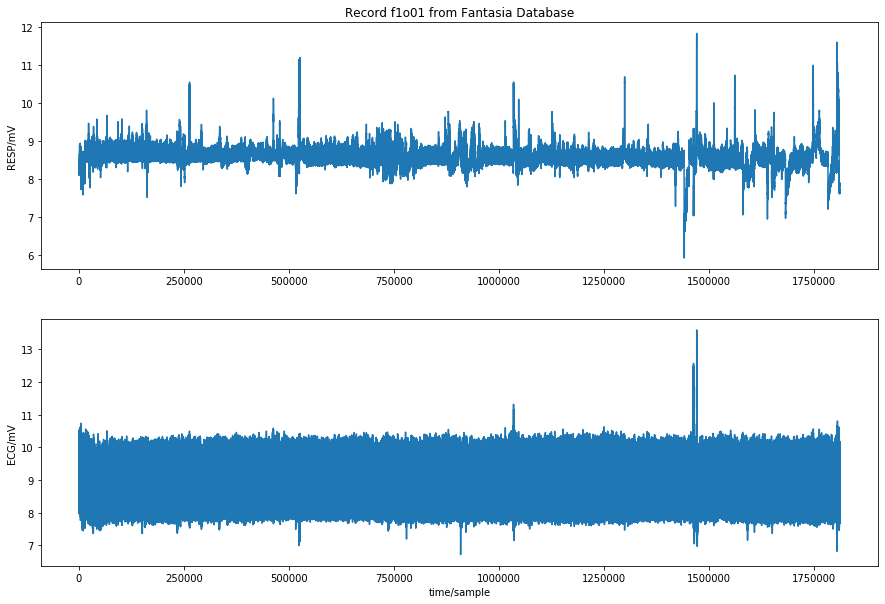

{'record_name': 'f1o01',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1812903,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 77 Sex: F'],
 'sig_name': ['RESP', 'ECG'],
 'p_signal': array([[ 8.488,  8.46 ],
        [ 8.452,  8.592],
        [ 8.488,  8.352],
        ..., 
        [ 7.804,  8.172],
        [ 7.832,  7.892],
        [ 7.884,  7.94 ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['f1o01.dat', 'f1o01.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [2000.0, 2000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [16976, 16920],
 'checksum': [1480, 20840],
 'block_size': [0, 0]}

In [3]:
wfdb.plot_wfdb(record=rec0_f, title='Record f1o01 from Fantasia Database', figsize=(15,10)) 
display(rec0_f.__dict__)

Reading the record descriptors we see that this record is taken from a 77 years old woman (`'comments': ['Age: 77 Sex: F']`), the lenght of the ECG signal is `'sig_len': 1812903` and the frequency of the signal is 250 Hz (`'fs': 250`). 

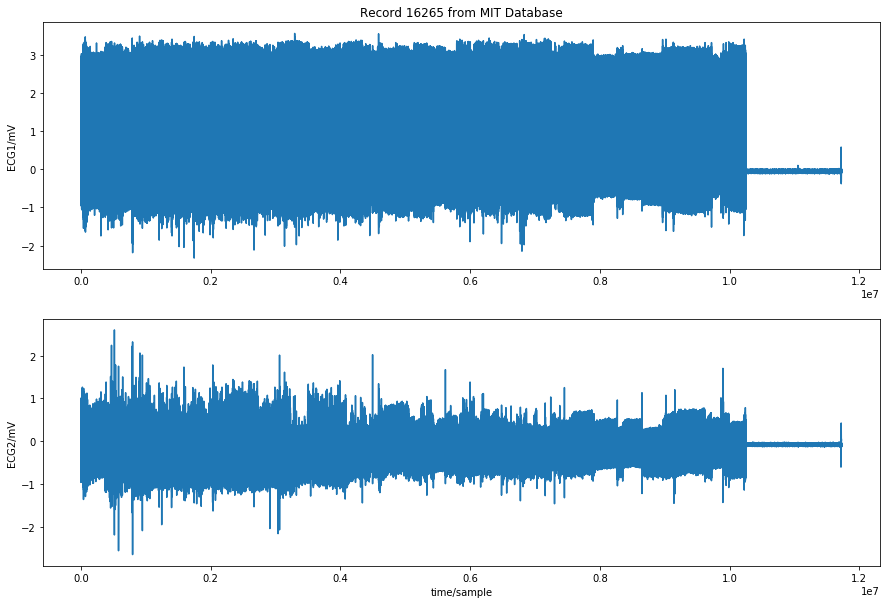

{'record_name': '16265',
 'n_sig': 2,
 'fs': 128,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 11730944,
 'base_time': datetime.time(8, 4),
 'base_date': None,
 'comments': ['32 M'],
 'sig_name': ['ECG1', 'ECG2'],
 'p_signal': array([[-0.165, -0.325],
        [-0.155, -0.325],
        [-0.195, -0.305],
        ..., 
        [-0.05 , -0.095],
        [-0.05 , -0.085],
        [-0.05 , -0.085]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['16265.dat', '16265.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [12, 12],
 'adc_zero': [0, 0],
 'init_value': [-33, -65],
 'checksum': [15756, -21174],
 'block_size': [0, 0]}

In [4]:
wfdb.plot_wfdb(record=rec0_mit, title='Record 16265 from MIT Database', figsize=(15,10)) 
display(rec0_mit.__dict__)

This record is taken from a 32 years old man (`'comments': ['32 M']`), the lenght of the ECG signal is `'sig_len': 11730944` and the frequency of the signal is 128 Hz (`'fs': 128`). 

In [5]:
#constants 
signal_freq_fantasia = 250
signal_freq_mit = 128
s_slide = [10, 25, 50, 125, 250, 500, 625, 1000, 1250, 1500]

## Data pre-processing<a name="ch3"></a>

The main shapes appearing in an ECG signal are three, all linked with a specific event of the heart beat.
<center>
    
<video src="ecg.mp4" controls  width="900" height="600" align="center"></video>
</center>

- The P waves, which represents the depolarization of the atria;
- The QRS complexes, which represents the depolarization of the ventricles;
- The T waves, which represents the repolarization of the ventricles.

(video from: https://gfycat.com/hardbarrenbluemorphobutterfly-ecg)

### Filtering<a name="ch3_1"></a>
<center>

<img src="https://upload.wikimedia.org/wikipedia/commons/9/9e/SinusRhythmLabels.svg" width="500" height="500" align="center"/>
</center>

Since our goal is to have heartrate measures, we decided to enhance just the greatest edge of each period, i.e. the R peak. To do that, we modified an existing algorithm, the Pan-Tomkins, which is commonly used for QRS complexes detection and signal denoising. We modified the algorithm in its structure and we also changed its parameters in order to amplify and define very well the R peaks and suppress the rest of the signal, minimizing the risk of recording false positives as maxima.

Here is a flow chart comparing the Pan-Tompkins algorithm and the custom one we used. [4]

<center>
<img src="dd1.png" width="1600" height="1200" align="center"/>
</center>

#### Filters implementation

The process of filtering we used in this project consists of the following procedure:

1. A band-pass filter is applied to increase the signal-to-noise ratio. It selects the frequencies in a choosen interval, eliminating the frequencies outside the interval. We implement it using a FIR filter.


In [6]:
def pass_band(sig, fs, f1, f2): 
    b = signal.firwin(20, [f1/fs, f2/fs], pass_zero=False)
    w, h = signal.freqz(b)
    a = 1
    output = signal.lfilter(b, a, sig)
    return output

2. A derivative filter is applied to provide information about the slope of the QRS.  

$$f(z) = 3 (z_{i+2}-z_{i-2})  + (z_{i+1}-{z_{i-1}})$$
    

3. All the components of the signal that are below zero are suppressed.

\begin{equation}
  f(z) =
    \begin{cases}
      z & z \geq 0 \\
      0 & z<0
    \end{cases}       
\end{equation}



In [7]:
def derivative_filter_under0suppression(x, der_window):
    y=np.convolve(der_window, x)
    y[y < 0] = 0 
    return(y)

4. The filtered signal is squared to enhance the dominant peaks.

$$f(z) = z^2$$

5. All the components of the signal below the threshold \alpha of the mean minus three standard deviation of the whole signal are setted to zero. The threshold chosen is $\alpha = \bar{z} + 3 \sigma$ where $\bar{z}$ is the mean value of $z$ and $\sigma$ its standard deviation.

\begin{equation}
  f(z) =
    \begin{cases}
      z & z \geq \alpha \\
      0 & z< \alpha
    \end{cases}       
\end{equation}


In [8]:
def squaring_and_treshold_suppression(x):
    y = x*x
    m = np.mean(y)
    s = np.std(y)
    y[y<(m+3*s)] = 0
    return(y)

In [9]:
def Pan_Tompkins_modified(signal, freqs=[250,16,24], der_window=[3,1,0,-1,-3], i_plots=False):
    o1 = pass_band(signal,freqs[0],freqs[1],freqs[2])
    o2 = derivative_filter_under0suppression(o1,der_window)
    o3 = squaring_and_treshold_suppression(o2)
    d_sig = scipy.signal.detrend(signal)
    if i_plots==True:
        lims = [10000, 15000]
        fig, ax = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(18)
        ax[0].set_title("Band Pass Filtering")
        ax[0].set_xlabel("Index[n]")
        ax[0].set_ylabel("Amplitude")
        ax[0].plot(o1[lims[0]:lims[1]])
        
        ax[1].set_xlabel("Index[n]")
        ax[1].set_ylabel("Amplitude")
        ax[1].set_title("Derivative Filtering")
        ax[1].plot(o2[lims[0]:lims[1]])
        
        ax[2].set_xlabel("Index[n]")
        ax[2].set_ylabel("Amplitude")
        ax[2].set_title("Squaring Filtering - Final Output")
        ax[2].plot(o3[lims[0]:lims[1]], label = 'Filtered signal')
        ax[2].plot(d_sig[lims[0]:lims[1]], label = 'Original signal')
        plt.legend()
        plt.show()
        
    return(o3)

### R peaks detection<a name="ch3_2"></a>

In order to find the R peak positions from the filtered signal we use a specific function (`R_helper_detector`), which completes the task simply verifying the condition that a point should be higher than it's nearest neighbours to be considered a maximum. <br>

In [10]:
def R_helper_detector(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]) : 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)
    return(maxima)

In [11]:
def plot_maxima(R_peaks, filtered_signal):
    fig_M, ax_M = plt.subplots(1, 1, figsize=(8,6))
    fig_M.suptitle("Maxima Visualization", size = 'x-large', weight = "bold")
    
    ax_M.set_xlabel("index[n]")
    ax_M.set_ylabel("Amplitude")
    #selected interval to show maxima in the plot
    bound2 = [100000,102000]
    
    currM = R_peaks[R_peaks[:,0]<bound2[1], :]
    currM = currM[currM[:,0]>bound2[0], :]
    
    ax_M.scatter(range(bound2[0], bound2[1]), filtered_signal[bound2[0]:bound2[1]], s=1)
    ax_M.scatter(currM[:,0], currM[:,1], s=9, c='red')

### Polinomial local detrending<a name="ch3_3"></a>

In order to investigate the PDF of heart rate increments at different time scales, we remove non-stationariety of data using local detrending:

- We integrate the noisy time series ${b(i)}$ (with $i=1,...,N_{max}$), obtaining the cumulative time series $B(m) = \sum^m_{j=1}b(j)$;
- We divide $B(m)$ into sliding segments of equal size $2s$;
- In each interval $[1+s(k-1),s(k+1)]$ (with $k$ index of the box) we fit $B(i)$ using a polynomial function of the order $d$. We use the third order polynomial [1];
- We compute the differences $\Delta_s B(i) = B^*(i+s)-B^*(i)$ at a time $s$ by sliding in time over the segments.$B^*(i)$ is a deviation from the polynomial fit, divided by the standard deviation.

Using this procedure the (q-1)th order polynomial trends are eliminated and the probability density function of $\Delta_s B(i)$ is ready to be analysed. 

<center>
    
<img src="detrend.png" width="1000" height="700" align="center"/>
</center>

In [12]:
def detrend(b, s_slide):

    B_tot = np.cumsum(b)

    B_div = {}
    for s in s_slide:
        c = int(len(B_tot)/(2*s))
        B_div.setdefault(s, [])
        for i in range(c):
            B_div[s].append(B_tot[i*2*s:(i+1)*2*s])
    
    B_temp = {}

    for s in s_slide:
        c = int(len(B_tot)/(2*s))
        B_temp.setdefault(s, [])
        for i in range(c):
            if (s!=1):
                tmp = (B_div[s][i]).copy()
                detrend = polynomial(tmp, order = 3, plot = False)
                B_temp[s].append(detrend)
            else: B_temp[s].append(B_div[s][i])
        B_temp[s] = B_temp[s]/np.sqrt(np.var(B_temp[s]))
        
    B_star = {}

    for s in s_slide:
        c = int(len(B_tot)/(2*s))
        B_star.setdefault(s, [])
        for i in range(c):
            for j in range(2*s):
                B_star[s].append(B_temp[s][i][j])
    
    DB = {}

    for s in s_slide:
        DB.setdefault(s, [])
        for i in range(len(B_star[s])-s):
            diff = (B_star[s][i+s] - B_star[s][i])
            DB[s].append(diff)
    df = pd.DataFrame.from_dict(DB, orient = 'index')
    return(df)

In [13]:
## Apply filter, find maxima and compute the temporal difference between maxima

def start_filter(rec, channel, signal_freq, s_slide, display = False):
    if display == True:
        fig_0, ax_0 = plt.subplots(1, 1, figsize=(15,0.5))
        ax_0.axis('off')
        fig_0.suptitle(str(rec.record_name), size="xx-large", weight = "heavy", ha = 'left')
    sig = rec.p_signal
    sig = sig[:,channel].reshape(len(sig[:,channel]))

    #filter signal and maxima detection
    if(len(sig) > 10000000):
        sig = sig[0:7200000]
    y = Pan_Tompkins_modified(sig,freqs=[signal_freq,8,12], i_plots= display)
    R_peaks = R_helper_detector(y)
    R_peaks = R_peaks[100:-100, :]   #refuse first 100 and last 100
    if display == True:
        plot_maxima(R_peaks, y)
    
    #compute delta b 
    b = []
    for i in range(1, len(R_peaks)):
        b.append(R_peaks[i,0]-R_peaks[i-1,0])
    b = np.array(b)/signal_freq
    b = b[0:(len(b)//1000)*1000]

    return b

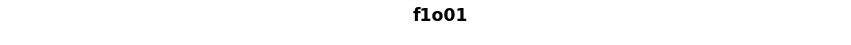

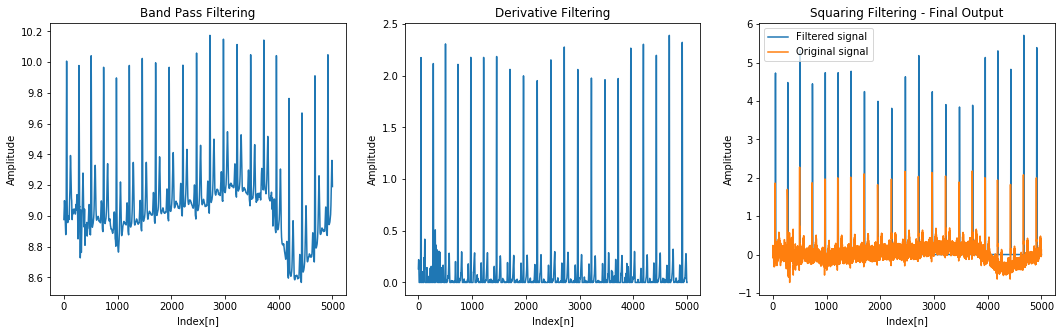

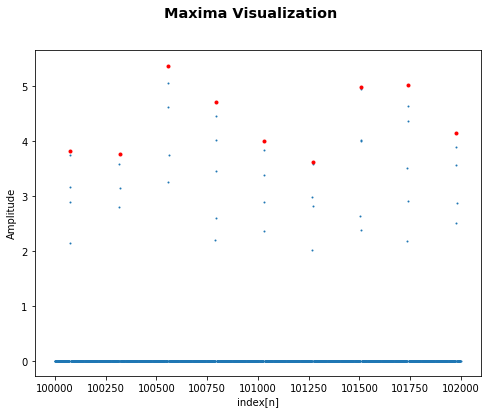

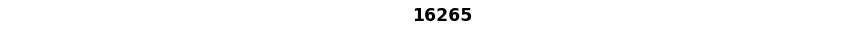

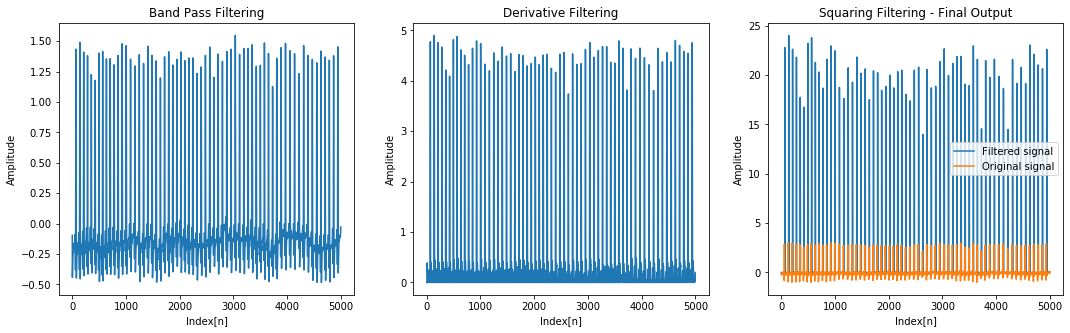

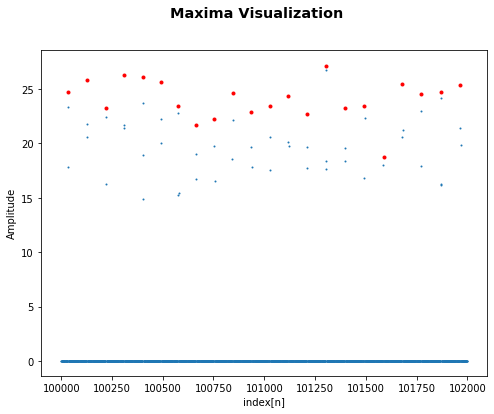

In [14]:
subj0_f = start_filter(rec0_f, 1, signal_freq_fantasia, s_slide, display = True)
subj0_mit = start_filter(rec0_mit, 0, signal_freq_mit, s_slide, display = True)

### 1/f scaling<a name="ch4"></a>
To demonstrate the validity of our records, we examine a typical characteristic of the R-R time series. In fact, it is well known [1] [8] that the power spectrum of this kind of signal displays 1/f scaling. In this analysis we first eliminate those samples who do not show this feature _qualitatively_ , and then we show that the mean power spectrum over all subjects of a dataset displays this type of scaling.
The subjects eliminated in this phase are not taken into account in the following analysis.

In [15]:
#all the subjects of each dataset are loaded and filtered
rec01_f = rec02_f = rec03_f = rec04_f = rec05_f = rec06_f = rec07_f = rec08_f = rec09_f = rec10_f = 0
rec11_f = rec12_f = rec13_f = rec14_f = rec15_f = rec16_f = rec17_f = rec18_f = rec19_f = rec20_f = 0
f = []
for i in range(2):
    for j in range(1,11):
        n = str(i)+str(j)
        if (j==10): n = str((i+1)*j)
        if(i == 0):
            age = 'o'
        else:
            age = 'y'
        if (j==10): index = str(j)
        else: index = '0'+str(j)
        x = 'rec'+str(n)+'_f'
        path = 'fantasia-database-1.0.0/f1'+age+index
        stream = x+'= wfdb.rdrecord("'+ path +'")'
        exec(stream)
        program_filter = 'start_filter('+x+', 1, signal_freq_fantasia, s_slide)'
        exec('f.append('+program_filter+')')

rec1_mit = rec2_mit = rec3_mit = rec4_mit = rec5_mit = 0
mit = []
values = [16265, 16272, 16273, 18184, 19090]
for i in range(1,6):
    x = 'rec'+str(i)+'_mit'
    path = './MIT_BIH_18H/'+str(values[i-1])
    stream = x+'= wfdb.rdrecord("'+ path +'")'
    exec(stream)
    program_filter = 'start_filter('+x+', 0, signal_freq_mit, s_slide )'
    exec('mit.append('+program_filter+')')

In [16]:
def power_spectrum(frame,signal_freq, n, s=0, display = False, beta = False):
    
    def smooth(y, box_pts):
        box = np.ones(box_pts)/box_pts
        y_smooth = np.convolve(y, box, mode='same')
        return y_smooth
    
    L = len(frame)
    freqs = [None]
    psd = [None]
    
    grad = [None]
    kink = [None]
    diff = [None]
    
    
    freqs, psd = signal.welch(frame, fs=signal_freq)
    psd = smooth(psd,50)
    grad = np.gradient(psd)
    diff = np.diff(grad)
    kink = (np.argmin(diff))
    
    if display == True:
        plt.figure(figsize=(5,3))
        if beta == True:
            plt.plot(freqs, psd, '-', label = 'subj_{}'.format(n)+'\nslice = {}'.format(s_slide[s]))
        else:
            plt.plot(freqs, psd, '-', label = 'subj_{}'.format(n))
        k = int(kink)
        plt.plot(freqs[k], psd[k], marker = '^', c='black', ms = 5)

        plt.xscale("log")
        plt.yscale("log")

        plt.title('Power Spectrum')
        plt.xlabel('Frequency')
       
        plt.ylabel('Power')
        plt.legend()
        plt.grid()
        plt.show()
    
    return (freqs, psd, kink)

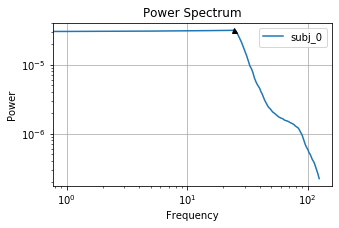

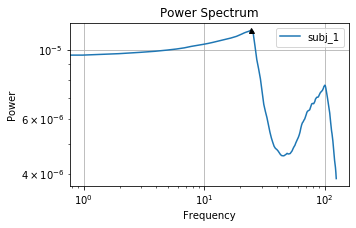

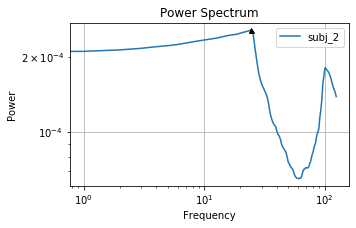

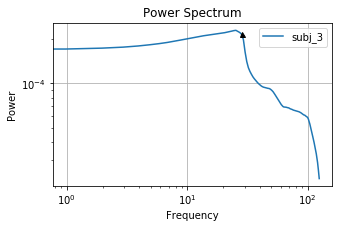

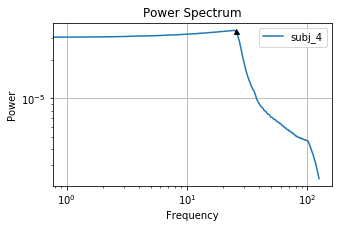

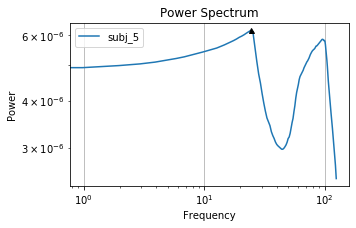

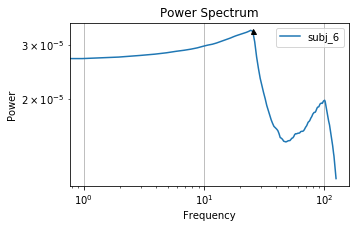

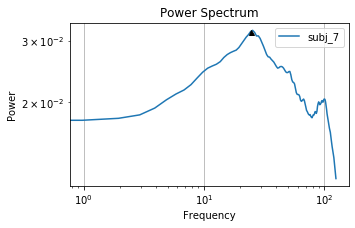

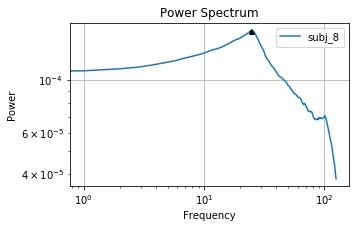

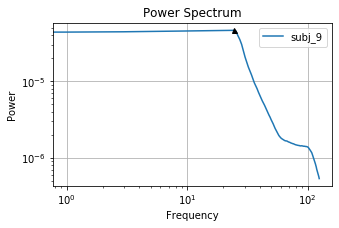

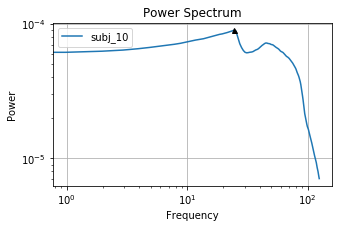

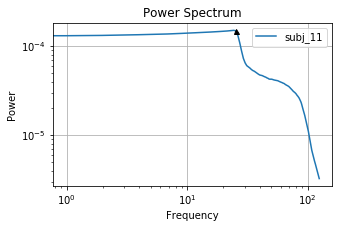

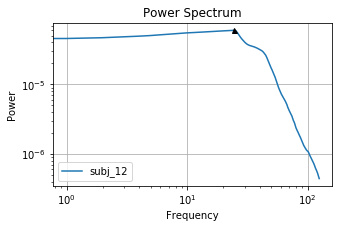

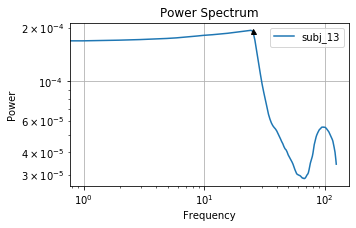

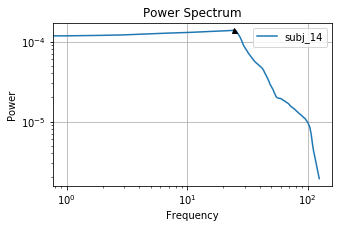

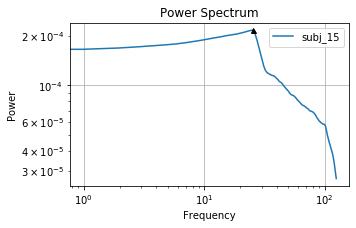

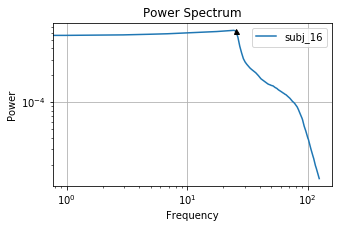

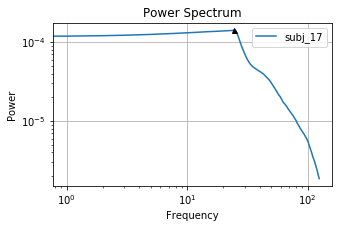

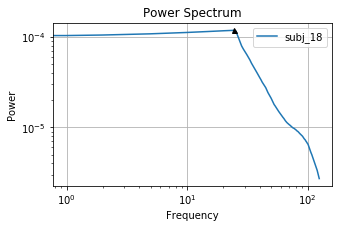

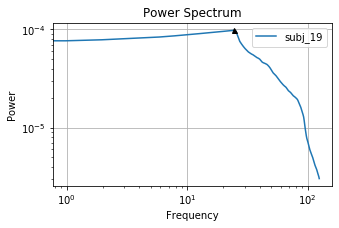

In [17]:
freqs_f = np.zeros((len(f),129))
psd_f = np.zeros((len(f),129))
k_f = np.zeros(len(f))
f = pd.DataFrame(f)

freqs_mit = np.zeros((len(mit),129))
psd_mit = np.zeros((len(mit),129))
k_mit = np.zeros(len(mit))
mit = pd.DataFrame(mit)
for i in range(len(f)):
    x = f.iloc[i]
    x = x[np.logical_not(np.isnan(x))]
    (freqs_f[i], psd_f[i], k_f[i]) = power_spectrum(x, signal_freq_fantasia,i, display = True)    

In [18]:
valid_f = [0,3,4,9,12,13,14,15,16,17,18,19]
mask = [i in valid_f for i in range(20)]
f = f[mask]
freqs_f = freqs_f[mask]
psd_f = psd_f[mask]
k_m_f = np.mean(k_f[mask])

k_m = k_m_f
freqs = freqs_f
psd = psd_f

offset =  [ 0.00217524]


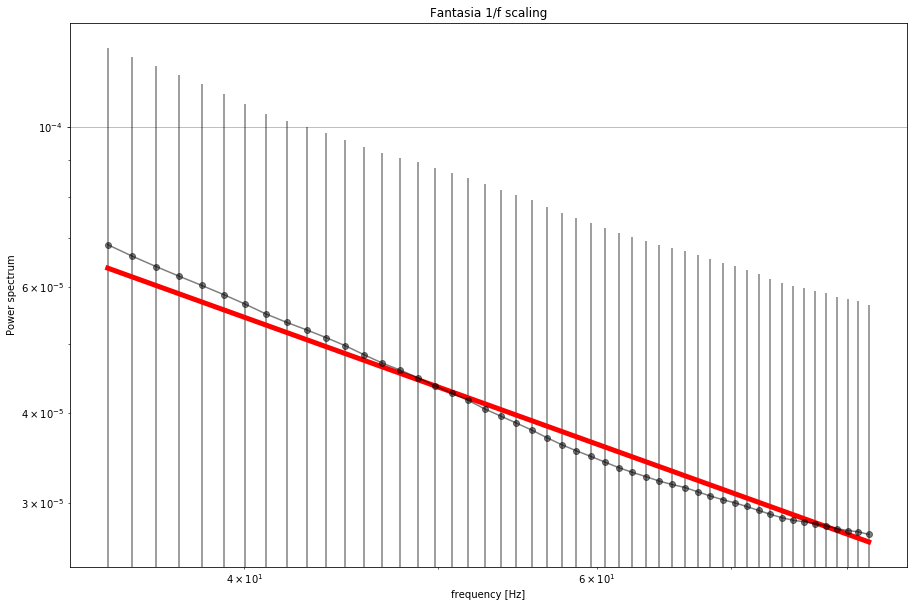

In [19]:
n = 10
m = 60
f_mean = np.mean(freqs, axis = 0)
p_mean = np.mean(psd, axis = 0)
p_std = np.std(psd, axis = 0)

def one_over_f(x,c):
    return c * x**(-1)
b_corr = scipy.optimize.curve_fit(one_over_f, f_mean[int(k_m)+n:int(k_m)+m], p_mean[int(k_m+n):int(k_m)+m], p0 = 1, sigma = p_std[int(k_m+n):int(k_m)+m]) 
print('offset = ',b_corr[0])
plt.figure(figsize=(15,10))
plt.errorbar(f_mean[int(k_m)+n:int(k_m)+m], p_mean[int(k_m)+n:int(k_m)+m],p_std[int(k_m)+n:int(k_m)+m] ,marker = 'o', c = 'black', alpha = .5)
plt.plot(f_mean[int(k_m)+n:int(k_m)+m], one_over_f(f_mean[int(k_m)+n:int(k_m)+m], b_corr[0]), c = 'red', lw = 5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("frequency [Hz]")
plt.ylabel("Power spectrum")
plt.title("Fantasia 1/f scaling")
plt.grid()
plt.show()

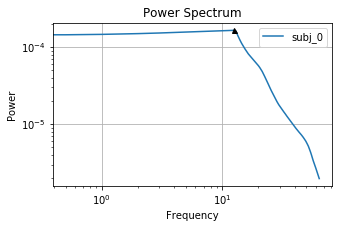

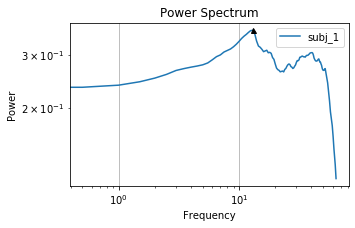

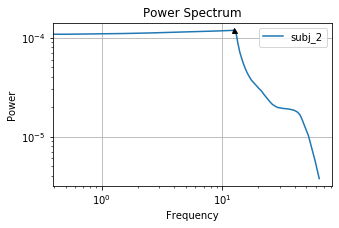

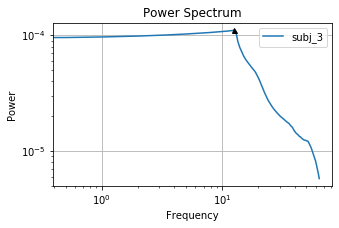

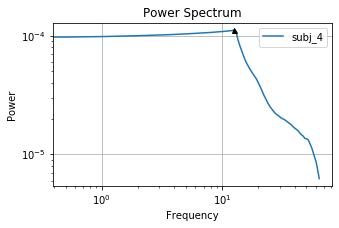

In [20]:
for i in range(len(mit)):
    x = mit.iloc[i]
    x = x[np.logical_not(np.isnan(x))]
    (freqs_mit[i], psd_mit[i], k_mit[i]) = power_spectrum(x, signal_freq_mit,i, display = True)

In [21]:
valid_mit = [0,2,3,4]
mask = [i in valid_mit for i in range(5)]
mit = mit[mask]
freqs_mit = freqs_mit[mask]
psd_mit = psd_mit[mask]
k_m_mit = np.mean(k_mit[mask])

offset =  [ 0.00058875]


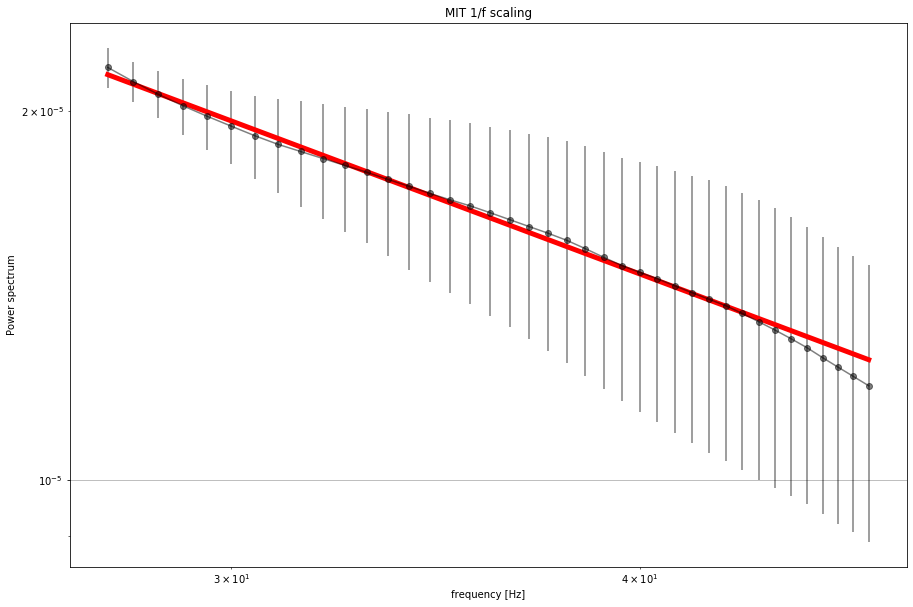

In [22]:
n = 30
m = 70
f_mean = np.mean(freqs_mit, axis = 0)
p_mean = np.mean(psd_mit, axis = 0)
p_std = np.std(psd_mit, axis = 0)

def one_over_f(x,c):
    return c * x**(-1)
b_corr = scipy.optimize.curve_fit(one_over_f, f_mean[int(k_m)+n:int(k_m)+m], p_mean[int(k_m+n):int(k_m)+m], p0 = 1, sigma = p_std[int(k_m+n):int(k_m)+m]) 
print('offset = ',b_corr[0])
plt.figure(figsize=(15,10))
plt.errorbar(f_mean[int(k_m)+n:int(k_m)+m], p_mean[int(k_m)+n:int(k_m)+m],p_std[int(k_m)+n:int(k_m)+m] ,marker = 'o', c = 'black', alpha = .5)
plt.plot(f_mean[int(k_m)+n:int(k_m)+m], one_over_f(f_mean[int(k_m)+n:int(k_m)+m], b_corr[0]), c = 'red', lw = 5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("frequency [Hz]")
plt.ylabel("Power spectrum")
plt.title("MIT 1/f scaling")
plt.grid()
plt.show()

### Data for the analysis


In [23]:
#all the selected signals are detrended and put in a dataframe
frames_f = []
frames_mit = []
for i in range(len(f)):
    x = f.iloc[i]
    x = x[np.logical_not(np.isnan(x))]
    frames_f.append(detrend(x, s_slide))
    
for i in range(len(mit)):
    x = mit.iloc[i]
    x = x[np.logical_not(np.isnan(x))]
    frames_mit.append(detrend(x, s_slide))

df_fantasia = pd.concat(frames_f, axis = 1)
df_mit = pd.concat(frames_mit, axis = 1)

In [24]:
df_fantasia

,0,1,2,3,4,5,6,7,8,9,...,7980,7981,7982,7983,7984,7985,7986,7987,7988,7989
10,0.674843,2.351140,2.446298,1.154525,0.029507,-0.540336,-1.526057,-1.762392,-1.249342,-0.181117,...,1.7708,0.092417,-0.575799,0.087133,0.797295,-0.114406,-1.043074,0.579128,0.772054,-0.400101
25,3.264515,2.637620,2.037557,1.369360,0.538064,-0.076472,-0.901588,-1.652392,-2.233917,-2.551201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,-3.461141,-3.097512,-2.846058,-2.457325,-2.044700,-1.676218,-1.487941,-1.230419,-0.926328,-0.552991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,-0.898421,-0.589512,-0.292788,0.002814,0.264102,0.457880,0.584150,0.687168,0.778002,0.834520,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,-0.169570,-0.023106,0.093903,0.188827,0.276407,0.364012,0.400052,0.421377,0.442727,0.486213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,0.109404,0.197839,0.265146,0.332540,0.408507,0.488805,0.564947,0.624203,0.696276,0.789652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,-0.231659,-0.188858,-0.158273,-0.125623,-0.097028,-0.070448,-0.062204,-0.053935,-0.043600,-0.025080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,-1.055484,-1.011861,-0.968274,-0.918654,-0.873115,-0.829635,-0.800350,-0.767056,-0.737843,-0.704620,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,-0.773251,-0.751202,-0.725957,-0.700703,-0.689792,-0.674090,-0.658379,-0.649039,-0.639691,-0.619173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,0.198890,0.230420,0.252774,0.264639,0.277831,0.283159,0.276687,0.271540,0.259844,0.253411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_mit

,0,1,2,3,4,5,6,7,8,9,...,65980,65981,65982,65983,65984,65985,65986,65987,65988,65989
10,-0.145716,-0.321820,0.118940,0.048114,-0.050676,-0.016224,0.151472,-0.031212,-0.080652,0.164357,...,0.451458,0.211795,0.230953,-0.097315,-0.368843,0.022613,0.066644,0.167414,0.12284,0.53917
25,-0.390953,-0.234455,-0.072827,-0.035806,-0.188256,-0.335578,-0.477771,-0.549968,-0.552170,-0.484375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,0.795333,0.561318,0.423484,0.315944,0.172814,0.092922,0.043325,-0.107748,-0.195583,-0.187238,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,0.227577,0.193112,0.173355,0.094398,0.015368,-0.048952,-0.083781,-0.148247,-0.153658,-0.100013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,0.328632,0.338872,0.404260,0.493819,0.568827,0.590562,0.566767,0.505187,0.413567,0.330630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,-3.084689,-3.058387,-3.028082,-3.006107,-2.984240,-2.958370,-2.920274,-2.890508,-2.860851,-2.818967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,-2.154375,-2.107320,-2.054404,-2.004888,-1.952598,-1.903708,-1.848956,-1.803780,-1.758917,-1.708192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,-0.566333,-0.598014,-0.622481,-0.643351,-0.595548,-0.580299,-0.546992,-0.508279,-0.478621,-0.447174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1250,3.133582,3.110682,3.087802,3.066317,3.043475,3.024781,3.015737,3.010841,3.001836,2.996979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1500,3.806271,3.797913,3.791870,3.785848,3.784437,3.777307,3.765606,3.751629,3.734228,3.714552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scale invariance of the PDF <a name="ch5"></a>

In order to show that the heart rate is controlled to converge continually to a critical state, we now analyse the scale invariance of the PDF of the heart rate increments.

### Gaussian and non-Gaussian fit<a name="ch5_1"></a>


We fit the data to a Gaussian and then for comparison to a function based on Castaing function:

$$\tilde{P}_s(x)=\int P_L\left(\dfrac{x}{\sigma}\right)\dfrac{1}{\sigma}G_{s,L}(\ln\sigma)d(\ln\sigma)$$

Here we assume that $P_L$ and $G_{s,L}$ are both Gaussian:

$$G_{s,L}(\ln\sigma) = \dfrac{1}{\sqrt{2\pi}\lambda}\exp\left(-\dfrac{\ln^2\sigma}{2\lambda^2}\right)$$

The parameter $\lambda$ was originally introduced as a parameter of a phenomenological model to describe non-Gaussian distributions in the study of intermittency of hydrodynamic turbulence (Castaing et al., 1990). 

Here we want to investigate the scale dependence of $\lambda$. We expect a stable value of lambda if we have a system near a critical state.


<center>
    
<img src="intro.png" width="600" height="600" align="center"/>
</center>
Image from the article [1] showing the standardized PDF of detrended heart rate increments for a single subject during costant routine protocol ($s = 8, 16, 32, 64, 128, 256, 512, 1024$ beats).

In [26]:
def Castaing(x, L):
    y = [scipy.integrate.quad(lambda s : (1/(2*np.pi*L*s**2))*
                              np.exp(-0.5*((x_i/s)**2 + (np.log(s)/L)**2)), 0, +np.infty ) for x_i in x]
    o = np.array(y)[:,0]
    return o

###### NOTE: how to compare experimental probability and theorical PDF
<center>
    
<img src="probability1.png" width="900" height="600" align="center"/>
</center>

##### The implementation of the fit with Castaing equation
<center>
    
<img src="Flow_Fit.PNG" width="1200" height="1000" align="center"/>
</center>



In [27]:
def res(y_data, y):
    return np.sum((y_data-y)**2)

In [28]:
# new version of Castaing that returns a number 
def Castaing0(x, L):
    y = scipy.integrate.quad(lambda s : (1/(2*np.pi*L*s**2))*
                             np.exp(-0.5*((x/s)**2 + (np.log(s)/L)**2)), 0, +np.infty) 
    o = np.array(y)[0]
    return o

In [29]:
# compute the integral of Castaing function using the trapezoidal rule
# a, b = intervals
# sens = number of sub-intervals
# L = lambda
def Integral_on_Castaing(a, b, sens, L):
    v_h = [0, 0]
    val = 0
    N_of_trapz = ((b-a)//sens)+1
    sen_c = (b-a)/N_of_trapz
    v_h[1] = Castaing0(a, L)
    for x_i in np.linspace(a, b, int(N_of_trapz))[1:]:
        v_h[0] = v_h[1]
        v_h[1] = Castaing0(x_i, L)
        val += 0.5*sen_c*(v_h[0]+v_h[1])
    y = val
    val = 0
    return(y)

In [30]:
# we use the Freedman Diaconis rule in order to compute the number of bins
def Freedman_Diaconis(x):
    IQR = scipy.stats.iqr(x)
    width = IQR*2/np.cbrt(len(x)) 
    n_b = (max(x)-min(x))/width
    N = round(n_b)
    return(min([int(N), 200]))

In [31]:
def Castainglog(x,L):
    y = [scipy.integrate.quad(lambda s : (1/(2*np.pi*L*s**2))*
                              np.exp(-0.5*((x_i/s)**2 + (np.log(s)/L)**2)), 0, +np.infty ) for x_i in x]
    o = np.sqrt(np.array(y)[:,0])*np.log(np.array(y)[:,0])
    return o

def chi_2_res(y_data, y):
    return 1/(len(y))*np.sum((y_data-y)**2/(y_data+y))

#### First approach: Least Squares algorithm on the logarithm of Castaing function

As a first approach, we estimate $\lambda$ with the least squares algorithm as an approximation of the $\chi^2$ function:
    
$$\sum_{i=1}^{N}\dfrac{(\rho_{exp}(x_{i+\frac{1}{2}})-\rho_{fit}(x_{i+\frac{1}{2}}))^2}{\rho_{exp}(x_{i+\frac{1}{2}})+\rho_{fit}(x_{i+\frac{1}{2}})}\approx \sum_{i=1}^{N} \left(\sqrt{\rho_{exp}(x_{i+\frac{1}{2}})}\log \rho_{exp}(x_{i+\frac{1}{2}}) - \sqrt{\rho_{fit}(x_{i+\frac{1}{2}})} \log \rho_{fit}(x_{i+\frac{1}{2}})\right)^2 $$

Where $\rho(x_{i+\frac{1}{2}})$ is the value of the Castaing function at the center of a bin. In particular $\rho_{exp}$ has been extimated as:

$$\rho_{exp}(x_{i+\frac{1}{2}}) = \dfrac{P_{i_{exp}}^{i+1}}{x_{i+1}-x_{i}}$$ 

where $P_{i_{exp}}^{i+1}$ is the count's probability in the $i$-th bin and at denominator the width of that bin 

This approximation is used in order to save computational power and time. Then, in order to verify the correctness of this hypothesis we calculate the normalized $\chi^2$ between the result of the fit and the experimental values of the histogram.

In [32]:
# this version of fit_and_plot plots the data and fit it using the Castaing function
# and scipy.optimize.curve_fit. It also computes the chi^2 using points.
def fit_and_plot(df, name):
    resume={'s':[], '$\lambda$ log_fit':[], 'chi$^2$n_log_fit':[],'chi$^2$_n L=0.4 ref[1]':[]}
    
    histo = {}
    Castaing_DB = {}
    
    gauss_DB = {}
    
    print('-----------', name, '----------------------------')
    for s in s_slide:
        
        gauss_DB.setdefault(s, [])
    
        histo.setdefault(s, [])
        Castaing_DB.setdefault(s, [])
        x = df.loc[s]
        mask = x.isna()
        x = x[mask == False]
        
        # for gaussian pdf
        mu, sigma = norm.fit(x)
        gauss_DB[s].append([mu,sigma])
        
        # evaluate the number of bins
        N_b = Freedman_Diaconis(x)
        counts, bin_edges = np.histogram(x, N_b, range = [-10, 10])
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
        tot = np.sum(counts)
        
         #FIT WITH LOG
        counts_log=[]
        bin_centres_log=[]
        
        for c_ in range(len(counts)): 
            if counts[c_]!=0: 
                counts_log.append(counts[c_])
                bin_centres_log.append(bin_centres[c_])
        
        param = scipy.optimize.curve_fit(Castainglog, bin_centres_log,np.sqrt(counts_log/((bin_edges[1] - bin_edges[0])*tot))*np.log(counts_log/((bin_edges[1] - bin_edges[0])*tot)), p0=0.4)
        
        plt_counts, plt_bin_edges = np.histogram(x,100, range = [-10,10])
        plt_bin_centres = (plt_bin_edges[:-1] + plt_bin_edges[1:])/2.
        histo[s].append([plt_counts, plt_bin_centres])

        delta_log=(bin_edges[1] - bin_edges[0])/2
        sensitivity_of_integration_log = 2*(delta_log)/5
        Y_th_log = np.array([Integral_on_Castaing(bin_edges[:-1][j],bin_edges[1:][j], 
                                                  sensitivity_of_integration_log, param[0][0]) 
                             for j in range(len(counts))])
        Y_th_kiono = np.array([Integral_on_Castaing(bin_edges[:-1][j], bin_edges[1:][j],  
                                                  sensitivity_of_integration_log, 0.4) 
                             for j in range(len(counts))])
        
        this_residue= chi_2_res((counts/tot), Y_th_log)
        
        resume['s'].append(s)
        resume['$\lambda$ log_fit'].append(param[0][0])
        resume['chi$^2$n_log_fit'].append(this_residue)
        residue_four=chi_2_res((counts/tot), Y_th_kiono)
        resume['chi$^2$_n L=0.4 ref[1]'].append(residue_four)
        
        Castaing_DB[s].append(param) 
        
    x = np.linspace(-10,10,100)
    colors = ["purple", "red", "orange", "green","blue","black","purple", "red", "orange","green"]
    i = 0
    
    fig, ax = plt.subplots(3, 1)
    fig.set_figheight(20)
    fig.set_figwidth(15)
    ax[0].set_title("Gaussian fit")
    ax[0].set_xlim(-10,10)
    ax[0].set_ylim(0.00000001,0.1)
    ax[0].set_yscale("log")
    ax[0].set_xlabel("$\Delta_s B/\sigma$")
    ax[0].set_ylabel("$\tilde{P}_s(\Delta_s B)$")
    ax[1].set_xlabel("$\Delta_s B/\sigma$")
    ax[1].set_ylabel("$\tilde{P}_s(\Delta_s B)$")
    ax[1].set_yscale("log")
    ax[1].set_title("Least squares")
    ax[2].set_title("Castaing fit with $\lambda=0.4$")
    ax[2].set_xlabel("$\Delta_s B/\sigma$")
    ax[2].set_ylabel("$\tilde{P}_s(\Delta_s B)$")
    ax[2].set_xlim(-10,10)
    ax[2].set_yscale("log")

    for s in s_slide:
        tot = np.sum(histo[s][0][0])
        y_data = histo[s][0][0]/(s*tot)
        y_fit = Castaing(x, Castaing_DB[s][0][0])/(s*np.sum(Castaing(x,Castaing_DB[s][0][0])))
        y_exp = Castaing(x, 0.4)/(s*np.sum(Castaing(x, 0.4)))
        gauss = norm.pdf(x, loc = gauss_DB[s][0][0], scale = gauss_DB[s][0][1])
    ######## Plots ###########################################################################
        ax[0].plot(histo[s][0][1],y_data,'o',  ms = 2.5 ,label = "s = {}".format(s), color = colors[i])
        ax[1].plot(histo[s][0][1],y_data,'o',  ms = 2.5 ,label = "s = {}".format(s), color = colors[i])
        ax[1].plot(x, y_fit, color = colors[i], label = "Castaing, s = {}".format(s))
        ax[2].plot(histo[s][0][1],y_data,'o',  ms = 2.5 ,label = "s = {}".format(s), color = colors[i])
        ax[0].plot(x, gauss/(s*np.sum(gauss)), "--" ,label= "Gauss, s = {}".format(s), color = "grey")
        ax[2].plot(x, y_exp, '--' ,color = "grey" ,label = "Castaing 0.4")
        i = i+1
     
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    plt.show()

    return histo, pd.DataFrame(resume)

----------- Fantasia dataset ----------------------------


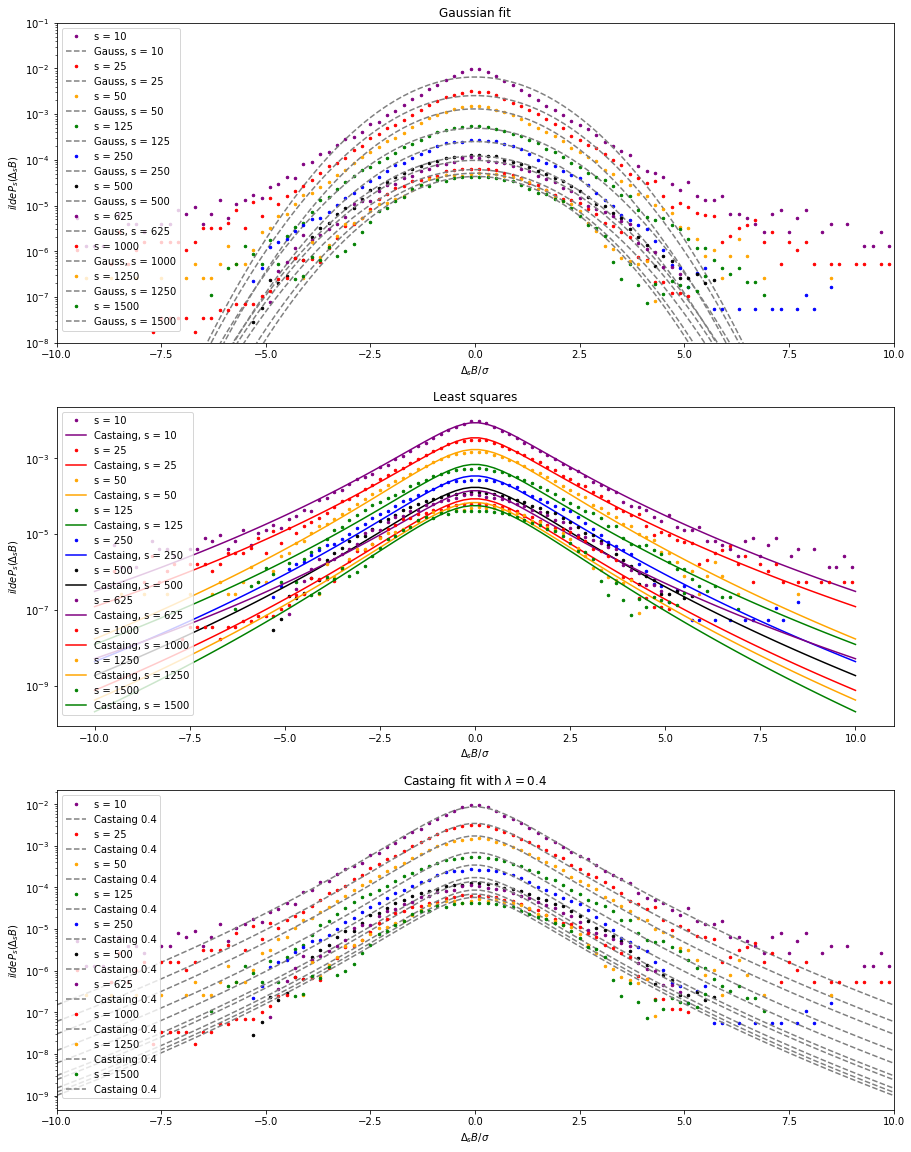

----------- MIT dataset ----------------------------


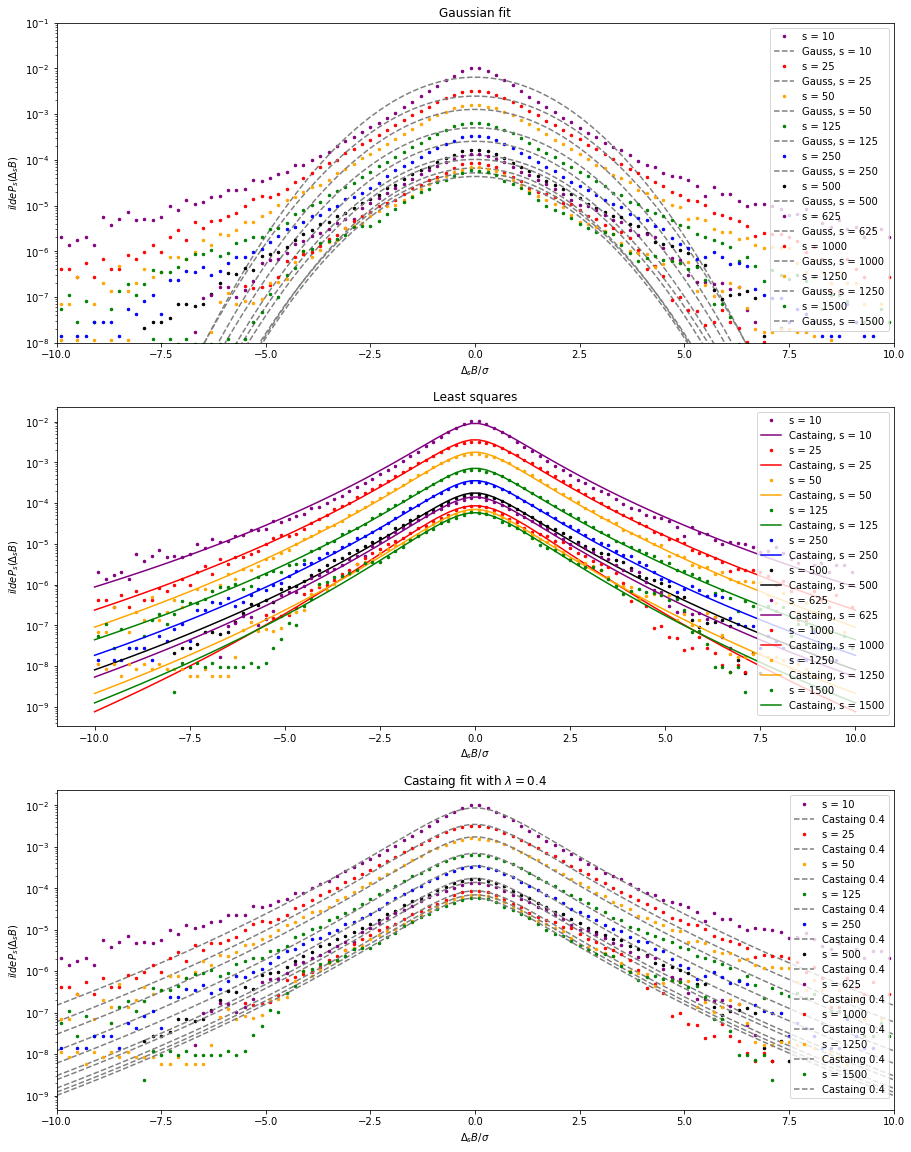

In [33]:
histo_fantasia , resume_sc_f= fit_and_plot(df_fantasia, 'Fantasia dataset')
histo_mit , resume_sc_mit= fit_and_plot(df_mit, 'MIT dataset')

In [34]:
print("Fantasia  fit")
display(resume_sc_f)
print("Mit fit")
display(resume_sc_mit)


Fantasia  fit


,s,$\lambda$ log_fit,chi$^2$n_log_fit,chi$^2$_n L=0.4 ref[1]
0,10,0.433896,0.000093,0.000096
1,25,0.433312,0.000101,0.000100
2,50,0.376335,0.000114,0.000115
3,125,0.400519,0.000214,0.000214
4,250,0.385619,0.000191,0.000193
5,500,0.379245,0.000398,0.000400
6,625,0.435966,0.000428,0.000421
7,1000,0.371257,0.000374,0.000378
8,1250,0.357846,0.000555,0.000584
9,1500,0.340019,0.000449,0.000488


Mit fit


,s,$\lambda$ log_fit,chi$^2$n_log_fit,chi$^2$_n L=0.4 ref[1]
0,10,0.495540,0.000108,0.000123
1,25,0.470715,0.000088,0.000095
2,50,0.454645,0.000088,0.000090
3,125,0.466515,0.000088,0.000093
4,250,0.455601,0.000084,0.000091
5,500,0.448361,0.000094,0.000102
6,625,0.438419,0.000097,0.000101
7,1000,0.371796,0.000116,0.000111
8,1250,0.426477,0.000094,0.000098
9,1500,0.409718,0.000106,0.000108


#### Second approach: minimum $\chi^2$ statistic

We decided also to estimate $\lambda$ from the minimum of the chi-square statistic [5], using a selfmade algorithm of gridsearch:

$$\chi^2 = \sum\dfrac{(P_{i,exp}(x)-P_{i,fit}(x))^2}{P_{i,exp}(x)+P_{i,fit}(x)}$$

where $P_{exp}$ and $P_{fit}$ denote the observed and approximated probability of count in a certain bin, respectively.

The fit is done using the condensed version of the datasets, with all the subjects together to compare the results with the previous one, but the extimation of $\lambda$ have been done with a fit on multiple dataframes, one for each subject, and then computing a statistic on the results.



<center>
    
<img src="probability2.png" width="900" height="600" align="center"/>
</center>


In order to compute $P_{i,fit}$ two methods have been used:
* a more approximated one:

$$P_{i,fit} = P_{s}(x_{i+\frac{1}{2}}) \cdot (x_{i+1}-x_{i})$$

* a more precise but slower one, in wich the integral is computed trough a trapezoidal integration algorithm:

$$P_{i,fit} = \int_{x_i}^{x_{i+1}} P_s (x)\,dx$$

In [35]:
# this version of fit_and_plot computes the chi^2 using the integral of the 
# Castaing function Integral_on_Castaing
def fit_and_plot2(df, name, _plot=False):
    resume={'s':[], 'L_chi_2_trapz':[], 'L_chi_2_approx':[], 'chi_2_trapz_integration':[], 'chi_2_rectangle_integration':[] }
    
    histo = {}
    histo_plt = {}
    Castaing_DB = {}
    L_esse = {}
    L_esse_p = {}
    print("computing : "+ name)
    colors = ["purple", "red", "orange", "green","blue","black","purple", "red", "orange","green"]
    col_idx=0
    if (_plot == True) : 
        fig_chi, ax_chi=plt.subplots(1,1, figsize=(20,10))
    for s in s_slide:
        resume['s'].append(s)
        histo.setdefault(s, [])
        L_esse.setdefault(s, [])
        L_esse_p.setdefault(s, [])
        x = df.loc[s]
        mask = x.isna()
        x = x[mask == False]
        if x.shape[0]<=500:
            print(s," had less than 500 values")                             
            continue
        sigma = np.std(x)
        N_b = Freedman_Diaconis(x)
        counts, bin_edges = np.histogram(x, N_b, range = [-10, 10])  
        b_i = bin_edges[0:-1]
        b_f = bin_edges[1:]
        bin_with=b_f[0]-b_i[0]
        bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
        histo[s].append([counts, bin_edges[:-1], bin_edges[1:]])
        
        histo_plt.setdefault(s, [])
        plt_counts, plt_bin_edges = np.histogram(x, 100, range = [-10, 10])  
        plt_bin_centres = (plt_bin_edges[:-1] + plt_bin_edges[1:])/2.
        histo_plt[s].append([plt_counts,plt_bin_centres])
        
        
        ######## fit ##########
        Y_exp_A = counts/np.sum(counts)
        Y_exp = counts/np.sum(counts)
        sensitivity_of_integration = (b_i[1]-b_i[0])/5
        bound_L = np.arange(0.3,0.47,0.03)
        chi_2_A = np.zeros(len(bound_L))
        chi_2 = np.zeros(len(bound_L))

        for i in range(len(bound_L)):
            #with integral
            Y_th_A = np.array([Integral_on_Castaing(b_i[j], b_f[j], sensitivity_of_integration, bound_L[i]) #<-build_data
                           for j in range(len(Y_exp_A))])
            Y_th_A = Y_th_A/np.sum(Y_th_A)
            
            chi_2_A[i] = np.sum(((Y_exp_A-Y_th_A)**2)/(Y_th_A+Y_exp_A))

            #with rectangles
            Y_th = Castaing(histo[s][0][1],bound_L[i])/(np.sum(Castaing(histo[s][0][1],bound_L[i])))
 
            chi_2[i] = np.sum(((Y_exp-Y_th)**2)/(Y_th+Y_exp))
            
        #find_minima     
        idx_m = np.where(chi_2_A == min(chi_2_A))
        idx_p = np.where(chi_2 == min(chi_2))
        
        L_esse[s].append(bound_L[idx_m])
        L_esse_p[s].append(bound_L[idx_p])
        
        resume['L_chi_2_trapz'].append(bound_L[idx_m][0])
        resume['L_chi_2_approx'].append(bound_L[idx_p][0])
        
        resume['chi_2_rectangle_integration'].append(chi_2_A[idx_p][0]/len(Y_exp))
        resume['chi_2_trapz_integration'].append(chi_2_A[idx_m][0]/len(Y_exp))
        #######################
        
        if(_plot==True):
            
            fig_chi.suptitle("---"+name+"---")
            ax_chi.set_xlim((-5,5))
            ax_chi.set_title("fit chi 2 with multiple trapz integration per bin")
            ax_chi.scatter(bin_centres,Y_exp_A/s,c=colors[col_idx], s=4, label='s ='+str(s))
            ax_chi.plot(bin_centres,Y_th_A/s,c=colors[col_idx], label = "Castaing s = " + str(s))
            ax_chi.set_yscale('log')
            col_idx+=1
        if _plot==True : ax_chi.legend()

    return(histo_plt,L_esse,L_esse_p,pd.DataFrame(resume))

computing : Fantasia ALL
computing : MIT ALL
computing : Fantasia 0
computing : Fantasia 1
computing : Fantasia 2
computing : Fantasia 3
computing : Fantasia 4
computing : Fantasia 5
computing : Fantasia 6
computing : Fantasia 7
computing : Fantasia 8
computing : Fantasia 9
computing : Fantasia 10
computing : Fantasia 11
computing : MIT 0
computing : MIT 1
computing : MIT 2
computing : MIT 3


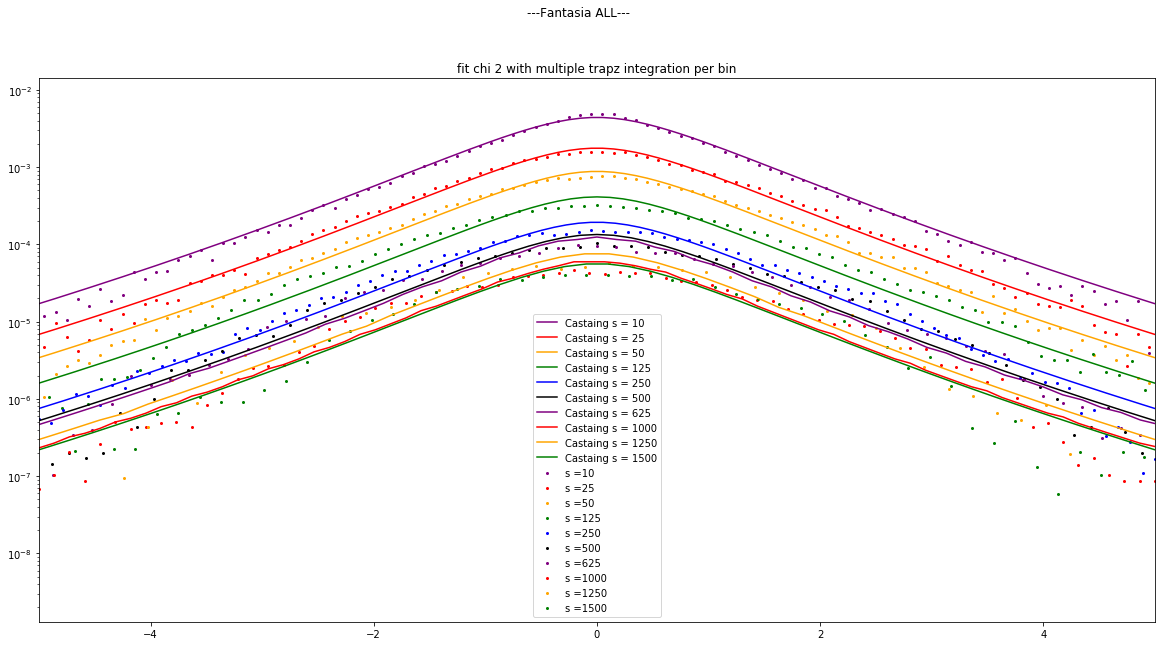

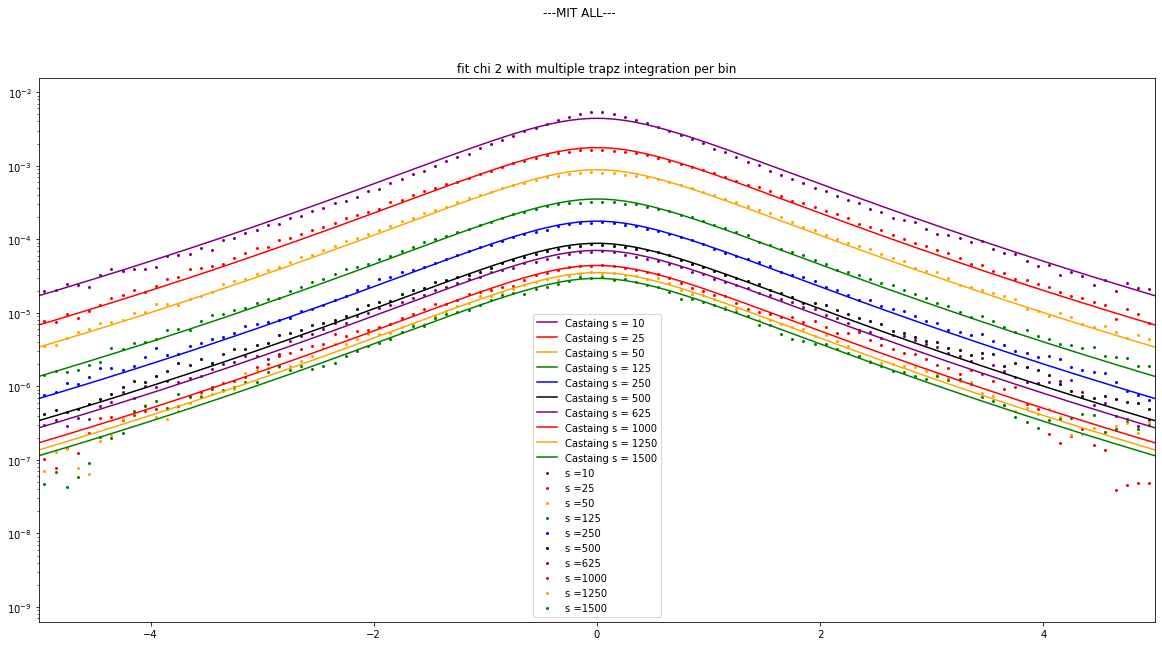

In [36]:
histo_fantasia, Lfantisiall,Lfantisiall_p, resume_f = fit_and_plot2(df_fantasia, "Fantasia ALL",True) 
histo_mit, Lmit, Lmit_p, resume_mit = fit_and_plot2(df_mit, "MIT ALL", True)

histo_subjf = [0]*(len(frames_f))
L_subjf = [0]*(len(frames_f))
L_subjf_p = [0]*(len(frames_f))
resume_f_subj = [0]*(len(frames_f))
histo_subjmit = [0]*(len(frames_mit))
L_subjmit = [0]*(len(frames_mit))
L_subjmit_p = [0]*(len(frames_mit))
resume_mit_subj = [0]*(len(frames_mit))
                 
for i in range(len(frames_f)):
    histo_subjf[i],L_subjf[i],L_subjf_p[i],resume_f_subj[i] = fit_and_plot2(frames_f[i], "Fantasia "+ str(i))

for i in range(len(frames_mit)):
    histo_subjmit[i],L_subjmit[i],L_subjmit_p[i],resume_mit_subj[i] = fit_and_plot2(frames_mit[i], "MIT "+ str(i))


## Comparison between fits
   
The fit procedures have been compared computing the normalized $\chi^2$ for each result of the various fit approaches for the condensed datasets.

$$\chi^2 = \dfrac{1}{N} \sum_{i=1}^{N} \dfrac{(P_{i_{exp}}(x)-P_{i_{fit}}(x))^2}{P_{exp}(x)+P_{fit}(x)}$$

where $N$ is the number of bins of an histogram an the theoretical value $P_{fit}$ is obtained with the trapezoidal integration algorithm over the Castaing function and $P_{exp}$ is the fraction of counts in the bin.

$$P_{i_{fit}}=\int_i^{i+1} P_{s}(x) \,dx $$

Below the next cell will be displayed 4 dataframes showing for the Mit and Fantasia databases the $\lambda$ parameter obtained and the extimation of the error done by each fit procedure.


In [37]:

#Fantasia
complete_resume_f=pd.concat([resume_f,resume_sc_f], axis=1)
complete_resume_f = complete_resume_f.loc[:,~complete_resume_f.columns.duplicated()]          
complete_resume_f=complete_resume_f.reset_index(drop=True) 
#Mit
complete_resume_mit=pd.concat([resume_mit,resume_sc_mit], axis=1)
complete_resume_mit = complete_resume_mit.loc[:,~complete_resume_mit.columns.duplicated()]          
complete_resume_mit=complete_resume_mit.reset_index(drop=True)  
_temp_=[0.4]*len(s_slide)
print(complete_resume_mit.columns)
complete_resume_mit_L=complete_resume_mit[['s','L_chi_2_trapz',
                                         'L_chi_2_approx','$\lambda$ log_fit']]
complete_resume_f_L=complete_resume_f[['s','L_chi_2_trapz',
                                         'L_chi_2_approx','$\lambda$ log_fit']]
complete_resume_mit_L['Literature value']=_temp_
complete_resume_f_L['Literature value']=_temp_

complete_resume_mit_ERR=complete_resume_mit[['s',
                                         'chi_2_trapz_integration',
                                         'chi_2_rectangle_integration','chi$^2$n_log_fit','chi$^2$_n L=0.4 ref[1]']]
complete_resume_f_ERR=complete_resume_f[['s',
                                         'chi_2_trapz_integration',
                                         'chi_2_rectangle_integration','chi$^2$n_log_fit','chi$^2$_n L=0.4 ref[1]']]


def highlight_min(s):
    #highlight the minimum in a Series green.
    is_max = s == s.min()
    return ['background-color: #99f9ff' if v else '' for v in is_max]

print("\nHighlight the minimum value in each row for merged database :")

print("--errors Fantasia--")
display(complete_resume_f_ERR.style.apply(highlight_min,axis=1))
print("--Lambdas Fantasia--")
display(complete_resume_f_L)
print("--errors MIT--")
display(complete_resume_mit_ERR.style.apply(highlight_min,axis=1))
print("--Lambdas MIT--")
display(complete_resume_mit_L)          

Index(['s', 'L_chi_2_trapz', 'L_chi_2_approx', 'chi_2_trapz_integration',
       'chi_2_rectangle_integration', '$\lambda$ log_fit', 'chi$^2$n_log_fit',
       'chi$^2$_n L=0.4 ref[1]'],
      dtype='object')

Highlight the minimum value in each row for merged database :
--errors Fantasia--


/home/clelia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/clelia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,s,chi_2_trapz_integration,chi_2_rectangle_integration,chi$^2$n_log_fit,chi$^2$_n L=0.4 ref[1]
0,10,0.000020,0.000020,0.000093,0.000096
1,25,0.000027,0.000027,0.000101,0.000100
2,50,0.000043,0.000043,0.000114,0.000115
3,125,0.000139,0.000139,0.000214,0.000214
4,250,0.000119,0.000119,0.000191,0.000193
5,500,0.000316,0.000316,0.000398,0.000400
6,625,0.000296,0.000296,0.000428,0.000421
7,1000,0.000266,0.000266,0.000374,0.000378
8,1250,0.000412,0.000412,0.000555,0.000584
9,1500,0.000324,0.000324,0.000449,0.000488


--Lambdas Fantasia--


,s,L_chi_2_trapz,L_chi_2_approx,$\lambda$ log_fit,Literature value
0,10,0.45,0.45,0.433896,0.4
1,25,0.42,0.42,0.433312,0.4
2,50,0.39,0.39,0.376335,0.4
3,125,0.39,0.39,0.400519,0.4
4,250,0.36,0.36,0.385619,0.4
5,500,0.39,0.39,0.379245,0.4
6,625,0.39,0.39,0.435966,0.4
7,1000,0.36,0.36,0.371257,0.4
8,1250,0.30,0.30,0.357846,0.4
9,1500,0.30,0.30,0.340019,0.4


--errors MIT--


,s,chi_2_trapz_integration,chi_2_rectangle_integration,chi$^2$n_log_fit,chi$^2$_n L=0.4 ref[1]
0,10,0.000040,0.000040,0.000108,0.000123
1,25,0.000014,0.000014,0.000088,0.000095
2,50,0.000013,0.000013,0.000088,0.000090
3,125,0.000013,0.000013,0.000088,0.000093
4,250,0.000009,0.000009,0.000084,0.000091
5,500,0.000020,0.000020,0.000094,0.000102
6,625,0.000023,0.000023,0.000097,0.000101
7,1000,0.000037,0.000037,0.000116,0.000111
8,1250,0.000019,0.000019,0.000094,0.000098
9,1500,0.000029,0.000029,0.000106,0.000108


--Lambdas MIT--


,s,L_chi_2_trapz,L_chi_2_approx,$\lambda$ log_fit,Literature value
0,10,0.45,0.45,0.495540,0.4
1,25,0.45,0.45,0.470715,0.4
2,50,0.45,0.45,0.454645,0.4
3,125,0.45,0.45,0.466515,0.4
4,250,0.45,0.45,0.455601,0.4
5,500,0.45,0.45,0.448361,0.4
6,625,0.45,0.45,0.438419,0.4
7,1000,0.42,0.45,0.371796,0.4
8,1250,0.45,0.45,0.426477,0.4
9,1500,0.45,0.45,0.409718,0.4


## Considerations 

The best results are obtained with the $\chi^2$ method, althought the computationa is very demanding.
Notice that the two methods used to extimate $P_{i,fit}$ (with the same sensibility of the gridsearch) do not show discrepancies in the extimation of the parameters.
Since the best values of $\lambda$ are obtained through the minimization of the $\chi^2$ algorithm we decided to continue our analisys using the results obtained with this method.

#### Analysis of the parameter $\lambda$ 
<center>
    
<img src="lambda.png" width="400" height="500" align="center"/>
</center>

Image from the article [1] showing the dependence of the fitting parameter $\lambda^2$ on the scale s. The error
bars indicate the standard error of the group averages.

In [38]:
def lambda_extimation_and_stats(Ls, histos, name):
    
    # transfer lambdas in a dictionary
    ess = np.array([list(histos[i].keys()) for i in range(len(histos))])
    Ls1 = {}
    for i in range(len(Ls)):
         for s in Ls[i].keys():
            if s not in Ls1.keys(): 
                Ls1.setdefault(s, [])
            Ls1[s].append(Ls[i][s][0][0]) 
             
    _meanLs = []
    _stdLs = []
    ess = []
    
    for s in Ls1.keys():
        Ls1[s] = np.array(Ls1[s])
        Ls1[s].reshape((len(Ls1[s])))
        ess.append(s)
        _meanLs.append(np.mean(Ls1[s]))
        _stdLs.append(np.std(Ls1[s]))
        
    _stdLs=np.where(_stdLs>=(0.03/np.sqrt(12)),_stdLs,0.03/np.sqrt(12))
    print(_stdLs)
        
    fig, ax = plt.subplots(1, 1, figsize=(12, 9))
    fig.suptitle(name)
    ax.set_title("$\lambda$ as function of $s$")
    ax.plot(ess, _meanLs, c='orange', label='mean', ls='dotted')
    ax.errorbar(ess, _meanLs, xerr=None, yerr = _stdLs, c='royalblue', fmt='o', capsize=4)
    ax.set_xscale("log")
    ax.set_xlabel("$s$")
    ax.set_ylabel("$\lambda$")
    
    return _meanLs, _stdLs

[ 0.03570714  0.04322904  0.03741657  0.0509902   0.05024938  0.04264681
  0.06139015  0.05267827  0.04264681  0.0443706 ]
[ 0.01299038  0.00866025  0.015       0.015       0.00866025  0.00866025
  0.01299038  0.03        0.04918079  0.01299038]


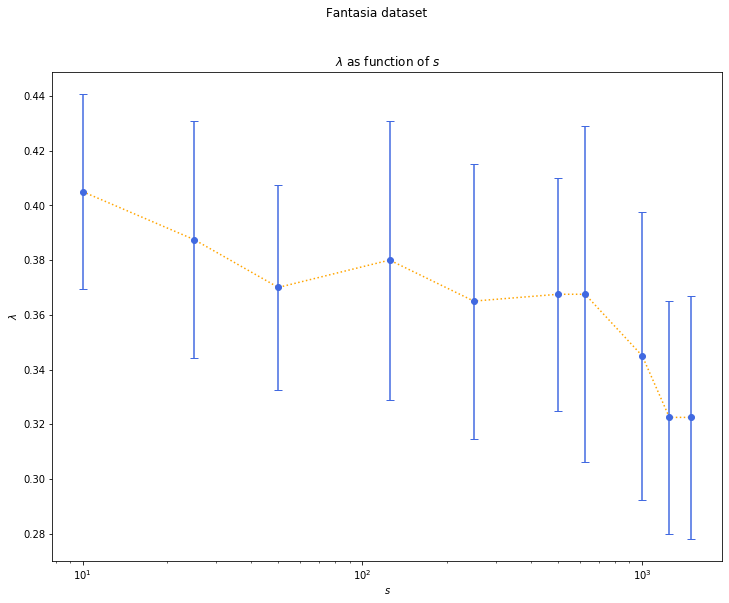

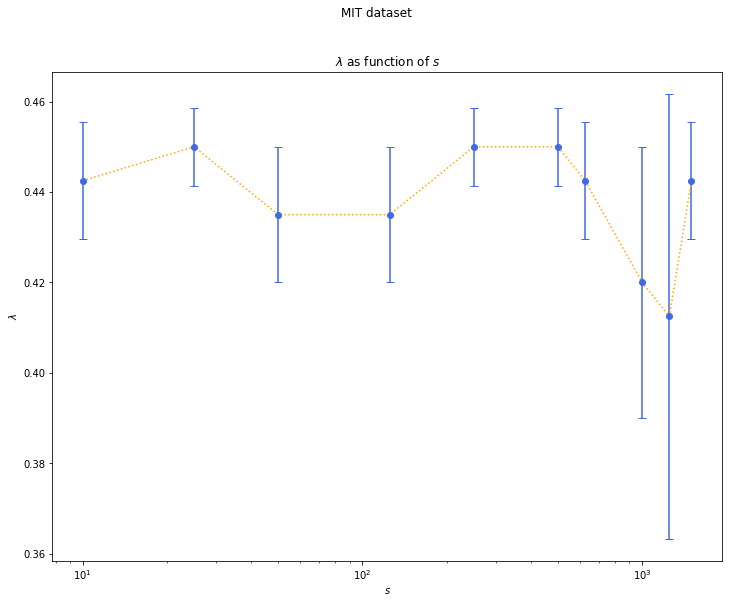

In [39]:
L_f, stdL_f = lambda_extimation_and_stats(L_subjf, histo_subjf, "Fantasia dataset")
L_mit, stdL_mit = lambda_extimation_and_stats(L_subjmit, histo_subjmit, "MIT dataset")

### Collapse plot

Fantasia dataset: lambda mean = 0.36 +- 0.02
MIT dataset: lambda mean = 0.43 +- 0.01


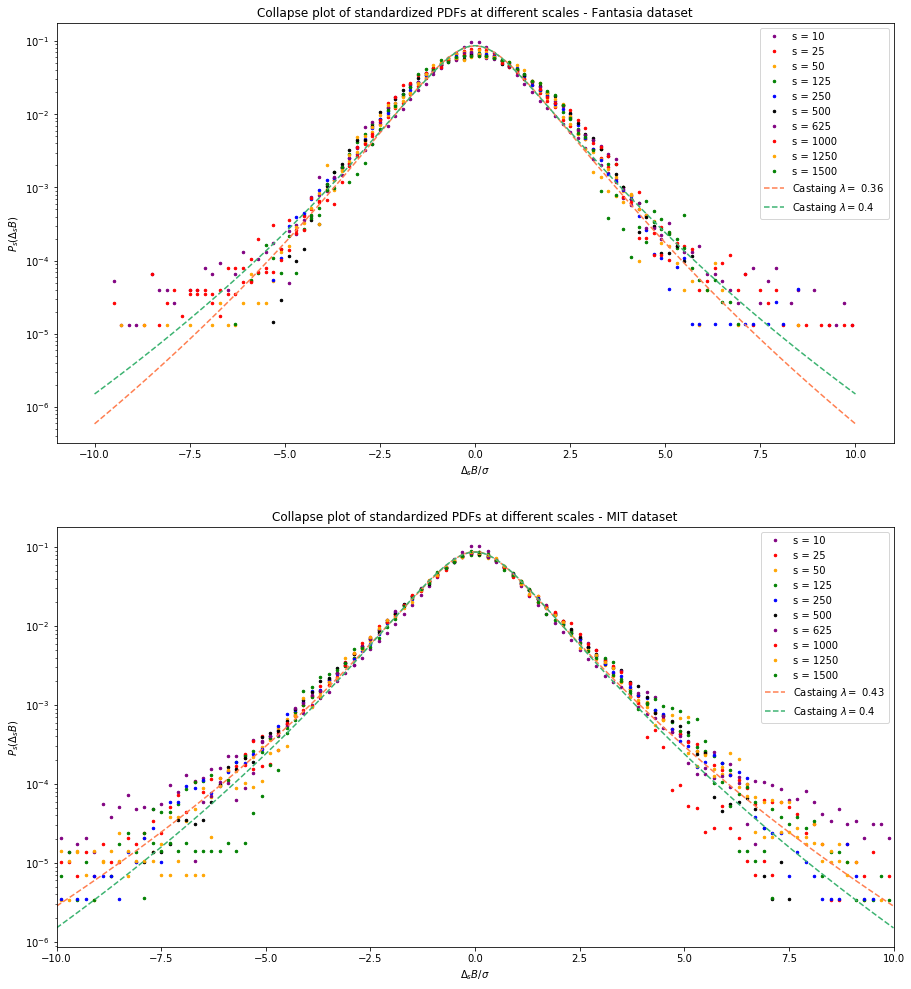

In [40]:
meanL_f = np.average(L_f, weights=stdL_f)
std_f = np.sqrt(np.average((L_f-meanL_f)**2, weights=stdL_f))

meanL_mit = np.average(L_mit, weights=stdL_mit)
std_mit = np.sqrt(np.average((L_mit-meanL_mit)**2, weights=stdL_mit))

print("Fantasia dataset: lambda mean = {:1.2f}".format(meanL_f), "+- {:1.2f}".format(std_f))
print("MIT dataset: lambda mean = {:1.2f}".format(meanL_mit), "+- {:1.2f}".format(std_mit))

x = np.linspace(-10,10,100)
y_cast_f = Castaing(x, meanL_f)/np.sum(Castaing(x, meanL_f))
y_cast_mit = Castaing(x, meanL_mit)/np.sum(Castaing(x, meanL_mit))
y_cast_04 = Castaing(x, 0.4)/np.sum(Castaing(x, 0.4))
fig, ax = plt.subplots(2, 1, figsize=(15, 17))
colors = ["purple", "red", "orange", "green","blue","black","purple", "red", "orange","green"]
i = 0
for s in s_slide:
        tot_f = np.sum(histo_fantasia[s][0][0])
        tot_mit = np.sum(histo_mit[s][0][0])
        y_data_f = histo_fantasia[s][0][0]/(tot_f)
        y_data_mit = histo_mit[s][0][0]/(tot_mit)
        ax[0].plot(histo_fantasia[s][0][1], y_data_f, 'o', ms = 2.5, label = "s = {}".format(s), color = colors[i])
        ax[1].plot(histo_mit[s][0][1], y_data_mit, 'o', ms = 2.5, label = "s = {}".format(s), color = colors[i])
        i = i+1

ax[0].plot(x, y_cast_f, '--' ,color = "coral" ,label = "Castaing $\lambda =$ {:1.2f}".format(meanL_f))
ax[0].plot(x, y_cast_04, '--' ,color = "mediumseagreen" ,label = "Castaing $\lambda = 0.4$")
ax[0].set_title("Collapse plot of standardized PDFs at different scales - Fantasia dataset")
ax[0].set_xlabel("$\Delta_s B/\sigma$")
ax[0].set_ylabel("$P_s(\Delta_s B)$")
ax[0].set_yscale("log")
ax[0].legend()
ax[1].plot(x, y_cast_mit, '--' ,color = "coral" ,label = "Castaing $\lambda =$ {:1.2f}".format(meanL_mit))
ax[1].plot(x, y_cast_04, '--' ,color = "mediumseagreen" ,label = "Castaing $\lambda = 0.4$")
ax[1].set_title("Collapse plot of standardized PDFs at different scales - MIT dataset")
ax[1].set_xlabel("$\Delta_s B/\sigma$")
ax[1].set_ylabel("$P_s(\Delta_s B)$")
ax[1].set_yscale("log")
ax[1].legend()
plt.xlim(-10, 10)
plt.show()

### A different approach: resampling the data<a name="ch5_2"></a>

We decided also to implement a new method designed by Ken Kiyono and discussed in the article [6]. This method follows four steps:

1. The time series of normal-to-normal R–R intervals are interpolated with a cubic spline function and resampled at an interval ($\Delta t$) of 250 ms (4 Hz), yielding interpolated time series $b(t)$. After subtracting average interval $b_{ave}$, integrated time series $B(t)$ are obtained by integrating $b(t)$ over the entire length:

$$B(t)=\sum^{t/\Delta t}_{i=1}b(i\Delta t)-b_{ave}$$

2. The local trend of $B(t)$ is eliminated by third-order polynomial that is fit to $B(t)$ within moving windows of length $2s$, where $s$ is the scale of analysis. 
3. Intermittent deviation $\Delta_sB(t)$ is measured as the increment with a time lag $s$ of the detrended time series $B^*(t)$.
4. $\Delta_sB$ is normalized by the standard deviation to quantify the probability density function. Then, the non-Gaussianity index $\lambda_s$ is estimated as

$$\lambda_s = \sqrt{\dfrac{2}{q(q-2)}\left[\ln\left(\dfrac{\sqrt{\pi}\langle|\Delta_sB|^q\rangle}{2^{q/2}}\right)-\ln\Gamma\left(\dfrac{q+1}{2}\right)\right]}$$

where $\langle|\Delta_sB|^q\rangle$ denotes an estimated value of the $q$-th order absolute moment of $\Delta_sB$. <br>
One advantage of this method is that operating a resampling we "enlarge" our dataset.  <br>
The optimal value of $q$ is 0.25, i.e. we base the calculation of $\lambda_s$ on the 0.25-th moment emphasizing the central part of the PDF and reducing the effects of large outliers. 

Since in the cited article subjects were rejected when their ECG records lasted less than 22h, we used this approach only on the MIT dataset.

In [41]:
def alt_detrend(b, s_slide):
    
    # step 1
    cs = scipy.interpolate.CubicSpline(np.arange(len(b)), b)
    x = np.linspace(0,len(b),num=len(b)*4 )
    ##### plot ######
    plt.plot(x, cs(x), c = 'red', alpha = 0.5, label = 'Cubic spline') # plot of the cubic spline in red
    plt.plot(b, '--', c = 'grey', label = 'Real R-R') # plot of the b series in grey
    plt.xlabel("index")
    plt.ylabel("$b$")
    plt.title("Plot of the interbeat intervals with cubic spline fit")
    plt.legend()
    plt.show()
    ################
    b = cs(x)
    
    B_tot = np.cumsum(b - np.mean(b))
    ################
    
    # step 2
    B_div = {}
    for s in s_slide:
        c = len(B_tot)
        c = int(c/(2*s))
        B_div.setdefault(s, [])
        for i in range(c):
            B_div[s].append(B_tot[i*2*s: (i+1)*2*s])
    
    B_star = {}

    for s in s_slide:
        c = len(B_tot)
        c = int(c/(2*s))
        B_star.setdefault(s, [])
        for i in range(c):
            tmp = (B_div[s][i]).copy()
            detrend = polynomial(tmp, order = 3, plot = False)
            B_star[s].append(detrend)
    
    # step 3    
    Delta_B = {}

    for s in s_slide:
        c = len(B_tot)
        c = int(c/(2*s))
        Delta_B.setdefault(s, [])
        for i in range(c):
            for j in range(2*s):
                Delta_B[s].append(B_star[s][i][j])
    
    DB_star = {}

    for s in s_slide:
        DB_star.setdefault(s, [])
        for i in range(int(s/2), len(Delta_B[s])-int(s/2)):
            diff = (Delta_B[s][i+int(s/2)] - Delta_B[s][i-int(s/2)])
            DB_star[s].append(diff)
    
    # step4
    for s in s_slide:
        DB_star[s] = DB_star[s]/np.std(DB_star[s])
    df = pd.DataFrame.from_dict(DB_star, orient = 'index')
    return df

In [42]:
def Lambda_Exponent(df, q):
    L = [None]*len(s_slide)
    for i in range(len(s_slide)):
        dB_q = np.mean(np.abs(df.iloc[i])**q)
        sq_arg = (2/(q*(q-2)))*(np.log(np.sqrt(np.pi)*dB_q/(2**(q/2)))-np.log(scipy.special.gamma((q+1)/2)))
        L[i] = np.sqrt(sq_arg)
    return L

/home/clelia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


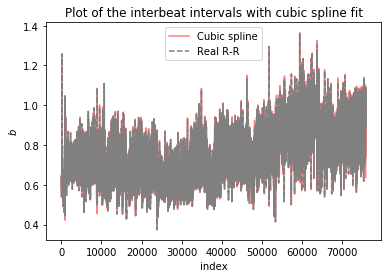

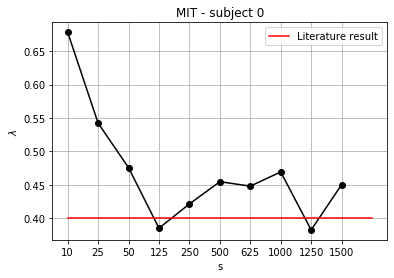

/home/clelia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


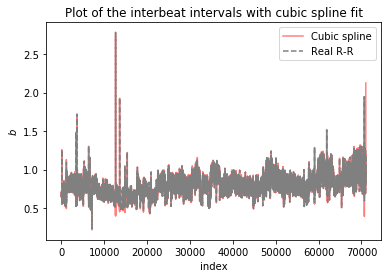

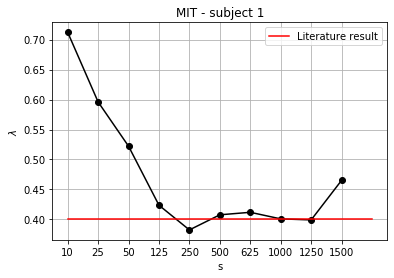

/home/clelia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


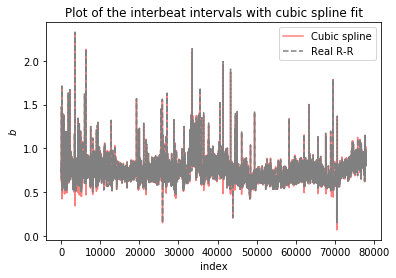

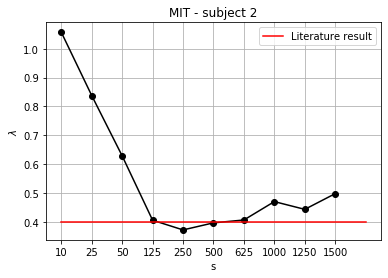

/home/clelia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


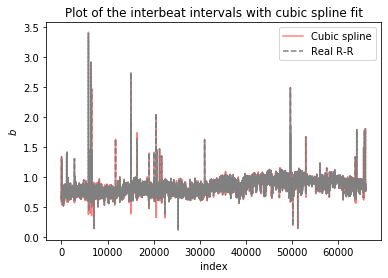

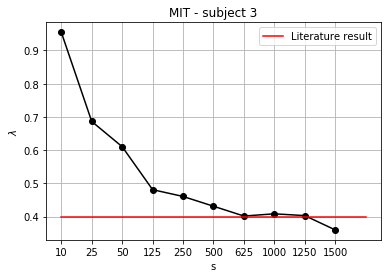

In [43]:

Lmit = []

for i in range(len(mit)):
    x = mit.iloc[i]
    x = x[np.logical_not(np.isnan(x))]
    s = alt_detrend(x, s_slide)
    L = Lambda_Exponent(s, 0.25)
    Lmit.append(L)
    plt.plot(L, marker='o', c = 'black')
    plt.plot([0,10], [0.4,0.4], c = 'r', label = 'Literature result')
    plt.xticks(np.arange(0, len(s_slide), step=1), labels=s_slide)
    plt.title("MIT - subject {}".format(i))
    plt.xlabel("s")
    plt.ylabel("$\lambda$")
    plt.legend()
    plt.grid()
    plt.show()

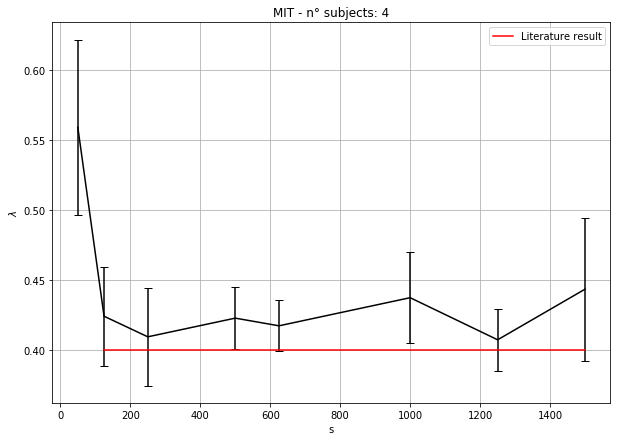

In [44]:
Lmit_mean = np.mean(Lmit, axis = 0)
Lmit_std = np.std(Lmit, axis = 0)

plt.figure(figsize=(10,7))
plt.errorbar(s_slide[2:],Lmit_mean[2:],Lmit_std[2:], c = 'black', capsize=4)
plt.plot([125,1500], [0.4,0.4], c = 'r', label = 'Literature result')
plt.title('MIT - n° subjects: {}'.format(len(Lmit)))
plt.xlabel("s")
plt.ylabel("$\lambda$")
plt.legend()
plt.grid()
plt.show()

### Considerations<a name="ch5_3"></a>

<center>
    
<img src="conclusion.png" width="1200" height="800" align="center"/>
</center>

## Multifractality<a name="ch6"></a>

We want to show that healthy human heartbeat require a large number of exponents to characterize its scaling properties, i.e. that it is a multifractal process. In order to do that we use a method called *detrended fluctuation analysis* (DFA). We compute the $q$-th order mean deviation from the trend, i.e. the $q$-th order fluctuation function

$$F_{q}(s)=\left({\frac {1}{N}}\sum _{t=1}^{N}(\Delta_sB)^{q}\right)^{1/q}$$

For self-similar processes of length N with nonoverlapping windows of size $s$ the fluctuation $F$ depends on the window size $s$ in a power law fashion [7]:

$$F_{q}(s)\propto s^{\alpha (q)}$$

where $\alpha$ should be a concave function of $q$ [9]. This is verified by making a plot it turns out to be confirmed for all scales $s$.  

## Long range temporal correlations

For $q=2$, i.e. if we consider the fluctuation function $F_2(s)$, the exponent $\alpha$ can be seen as a generalization of the so called Hurst exponent, which represents the long-range power law correlation properties of the signal:

* if $\alpha = 0.5$, there is no correlation and the signal b(i), the increment of the B(i) analyzed, is uncorrelated white noise; 
* if $\alpha < 0.5$, the signal is anti-correlated; 
* if $\alpha > 0.5$, the signal is correlated.

So, in order to prove that human heartbeat presents long range autocorrelations we have to find that, for $q=2$, $\alpha > 0.5$.

In [45]:
def fluc_func(frame, q):
    frame_c = frame.copy() 
    N = len(frame_c) 
    S = len(s_slide)
    F = np.zeros((S,N))
    FF = np.zeros(S) 
    for i in range(N):
        frame_c[i] = np.abs(frame_c[i]).pow(q)
        F[:,i] = (np.mean(frame_c[i], axis = 1)).pow(1/q)
    FF = np.mean(F, axis = 1)
    return FF

For q = 2 the values of the alpha exponent for each scale s considered are:
 [ 0.6196742   0.63139605  0.61549943  0.65406727  0.64228845  0.66529552
  0.66041145  0.65594748  0.62329913  0.61057766]
Since all the values of alpha are greater than 0.5, the long range temporal correlation is confirmed.


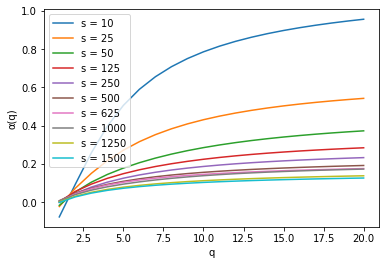

In [46]:
q = np.arange(1,21)
a_f = np.array([fluc_func(frames_f,i) for i in q])

print('For q =', q[1], 'the values of the alpha exponent for each scale s considered are:\n', a_f[1]/2)

if q[i].all() > 0.5:
    print('Since all the values of alpha are greater than 0.5, the long range temporal correlation is confirmed.')
else:
    print('There is no long range temporal correlation.')


for i in range(len(s_slide)):
    plt.plot(q, np.log(a_f[:,i])/np.log(s_slide[i]), label = "s = {}".format(s_slide[i]))
    plt.xlabel('q')
    plt.ylabel('α(q)')
plt.legend()
plt.show()

For q = 2 the values of the alpha exponent for each scale s considered are:
 [ 0.6196742   0.63139605  0.61549943  0.65406727  0.64228845  0.66529552
  0.66041145  0.65594748  0.62329913  0.61057766]
Since all the values of alpha are greater than 0.5, the long range temporal correlation is confirmed.


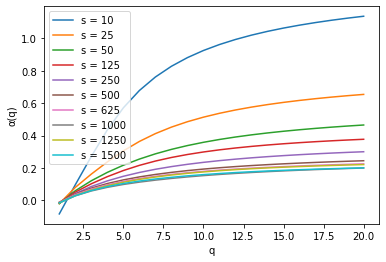

In [47]:
a_mit = np.array([fluc_func(frames_mit,i) for i in q])

print('For q =', q[1], 'the values of the alpha exponent for each scale s considered are:\n', a_f[1]/2)

if q[i].all() > 0.5:
    print('Since all the values of alpha are greater than 0.5, the long range temporal correlation is confirmed.')
else:
    print('There is no long range temporal correlation.')


for i in range(len(s_slide)):
    plt.plot(q, np.log(a_mit[:,i])/np.log(s_slide[i]), label = "s = {}".format(s_slide[i]))
    plt.legend()
    plt.xlabel('q')
    plt.ylabel ('α(q)')
plt.show()

## Conclusion <a name="ch7"></a>

The scale invariance it's graphycally evident in the collapse plot and the quantitative results are comparable with the ones in the paper [1].
The results from the different procedures lead to the thesis that the heart rate is controlled to converge continually to a critical state, indeed we get:
- $1/f$ scaling;
- Non gaussianity of the PDF;
- stable values of lambda;
- Collapse plot;
- Multifractality.

In the future it's possible to search different datasets to study the confidence level given by the model.
One other research can be done considering different "non-Gaussian" phenomena, in order to study the analogies and the differences [5].

# Thank you for the attention!

## Bibliography <a name="ch8"></a>


[1] Ken Kiyono et al., Educational Physiology Laboratory,"Critical scale invariance in a healthy human heart rate", 2004

[2] https://physionet.org/content/fantasia/1.0.0/ , 8/04/2020

[3] https://physionet.org/content/nsrdb/1.0.0/ , 8/04/2020

[4] Jiapu Pan and Willis J. Tompkins, senior memeber, IEEE, "A Real-Time QRS Detection Algorithm", 1985

[5] Ken Kiyono et al., College of engineering, Nihon University and Educational Physiology Laboratory, "Multiscale Fluctuation Analysis of Complex Signals", 2007

[6] Ken Kiyono et al., "Increased Non-Gaussianity of Heart Rate Variability Predicts Cardiac Mortality after an Acute Myocardial Infarction", 2011 (https://www.frontiersin.org/article/10.3389/fphys.2011.00065)

[7] Eke et al., Fractal characterization of complexity in temporal physiological signals, 2002

[8] Kobayashi, Masanori, and Toshimitsu Musha. "1/f fluctuation of heartbeat period." IEEE transactions on Biomedical Engineering 6 (1982): 456-457.

[9] Lin, D. C., and R. L. Hughson. "Modeling heart rate variability in healthy humans: a turbulence analogy." Physical Review Letters 86.8 (2001): 1650.